# Global GDP Evolution: Trends, Insights, and Future Projections

Economic growth is a **key indicator of a country's development**, influencing **living standards, investment opportunities, and global trade dynamics**. Understanding how GDP has changed over time helps us identify **which regions and economies have thrived, which have struggled, and what factors have driven these shifts**. 

More importantly, by utilizing **predictive modeling techniques**, we can **estimate potential economic trajectories up to 2035**, offering insights that may assist **policymakers, businesses, and researchers in planning for the future**.

This study **analyzes the Gross Domestic Product (GDP) of various countries from 1960 to 2023**, based on the latest **World Bank data**, to **identify long-term trends, economic shifts, and regional disparities**. By examining GDP evolution across **different regions, income groups, and economic blocs**, this analysis provides a **clear picture of how global economies have expanded, stagnated, or declined over time**. Additionally, we apply **machine learning methods to perform basic GDP predictions**, offering insights into potential economic growth **up to 2035**.

The core objectives of this analysis are:

- **To examine the historical growth of global economies**, identifying key inflection points and shifts in economic power.
- **To compare economic performance among different regions, economic blocs, and trade agreements**, assessing the impact of globalization and policy decisions.
- **To analyze Mexico’s economic evolution**, given its strategic position in North America and its role in trade agreements such as **USMCA**.
- **To predict future GDP trends** using **machine learning models**, exploring possible scenarios for **the global economy, economic blocs, and regional growth**.
- **To provide accessible, data-driven insights** that can be used by **economists, investors, policymakers, and business leaders** to make informed decisions.

This work incorporates **visualizations, predictive modeling, and comparative analysis** to highlight key insights, such as:

✔ **Which regions have experienced the highest economic growth?**  
✔ **How has Mexico’s economy evolved, and what are its future growth prospects?**  
✔ **What impact have economic agreements (e.g., USMCA, BRICS, ASEAN) had on GDP trends?**  
✔ **How do economic blocs compare in terms of growth and stability?**  
✔ **How might the global economy evolve in the coming years?**  
✔ **How do high-income countries compare to middle and low-income economies?**  

By presenting **clear, data-driven insights**, this project aims to offer a **comprehensive yet accessible understanding of global economic dynamics**, providing valuable information for **researchers, businesses, and policymakers**.

This study leverages **descriptive analytics, data visualizations, and machine learning forecasts** to **deliver a well-rounded perspective** on **global economic trends**. While the **future remains uncertain**, data-driven forecasting allows us to explore **likely scenarios**, offering valuable context for strategic planning and decision-making.

Ultimately, this project serves as a **resource for understanding how economies have evolved, where they are headed, and what challenges and opportunities lie ahead in the global economic landscape**.

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis and Time Series
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Machine Learning
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# File and OS Operations
import os

We start by **importing our libraries**, which will allow us to handle **data manipulation (pandas), numerical computations (numpy), visualizations (matplotlib), and time series forecasting (statsmodels)**. The foundation of our analysis is a **comprehensive dataset sourced from the World Bank**, containing **historical GDP values from 1960 to 2023** for multiple countries. This dataset provides a **detailed view of global economic performance** over the past six decades, covering both **developed and developing economies** across all major regions. 

In [2]:
# Original GDP World Bank Data for Descriptive Analytics
url = "https://raw.githubusercontent.com/ricardosillercardenas/da_projects_dataframes/main/gdp_wb_data.csv"
df = pd.read_csv(url)

Our analysis is based on a **comprehensive dataset from the World Bank**, containing **historical GDP values from 1960 to 2023** across multiple countries. This dataset provides a **detailed view of global economic performance**, covering both **developed and developing economies** across all major regions.

The data includes **nominal GDP values (in current US dollars)**, ensuring a **consistent basis for comparison** across different countries and periods. Maintained by the **World Bank**, this dataset serves as a **foundation for both descriptive and predictive analytics**, allowing us to examine **long-term economic trends, regional disparities, and country-specific growth trajectories**.

Once downloades, we can start processing the information.

# Data Processing for Descriptive Analytics

The original dataset presents GDP data in a **wide format**, where each year (1960-2023) is a separate column. While this format is useful for human reading, it is not ideal for **data manipulation and visualization**.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  211 non-null    object 
 1   Country Code  211 non-null    object 
 2   1960          103 non-null    float64
 3   1961          105 non-null    float64
 4   1962          107 non-null    float64
 5   1963          107 non-null    float64
 6   1964          107 non-null    float64
 7   1965          115 non-null    float64
 8   1966          116 non-null    float64
 9   1967          119 non-null    float64
 10  1968          120 non-null    float64
 11  1969          120 non-null    float64
 12  1970          140 non-null    float64
 13  1971          141 non-null    float64
 14  1972          141 non-null    float64
 15  1973          141 non-null    float64
 16  1974          141 non-null    float64
 17  1975          145 non-null    float64
 18  1976          145 non-null    

In [4]:
print(df.sample(10))

             Country Name Country Code          1960          1961  \
68                Georgia          GEO           NaN           NaN   
156    West Bank and Gaza          PSE           NaN           NaN   
195                Uganda          UGA  4.230084e+08  4.415241e+08   
166       Solomon Islands          SLB           NaN           NaN   
48                Czechia          CZE           NaN           NaN   
103           Korea, Rep.          KOR  3.958812e+09  2.417629e+09   
172           South Sudan          SSD           NaN           NaN   
60               Ethiopia          ETH  1.610512e+09  1.680860e+09   
84                Hungary          HUN           NaN           NaN   
5    United Arab Emirates          ARE           NaN           NaN   

             1962          1963          1964          1965          1966  \
68            NaN           NaN           NaN           NaN           NaN   
156           NaN           NaN           NaN           NaN           NaN  

## Conversion to Long Format

To make the dataset more manageable, we **converted it to a long format** using the `melt()` function. This transformation restructures the data so that each row represents a **single country-year observation**, with GDP values stored under a single column.  

In [5]:
#Conversion to Long format for better handling
df = df.melt(
    id_vars=["Country Name", "Country Code", "Region", "IncomeGroup"],  
    var_name="Year",  
    value_name="GDP"
).rename(columns={"Country Name": "Country", "Country Code": "ISO3"})

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13504 entries, 0 to 13503
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      13504 non-null  object 
 1   ISO3         13504 non-null  object 
 2   Region       13504 non-null  object 
 3   IncomeGroup  13504 non-null  object 
 4   Year         13504 non-null  object 
 5   GDP          11154 non-null  float64
dtypes: float64(1), object(5)
memory usage: 633.1+ KB
None


After the transformation, the dataset now includes:  
✔ **Country and ISO3 codes** for reference  
✔ **Region and Income Group classifications** for comparative analysis  
✔ **A structured Year column** (instead of separate year columns)  
✔ **A single GDP column** for easier handling in visualizations and analytics  

By transforming it into a **tidy (long) format**, we gain several advantages:  

✔ **Easier Filtering & Grouping** – We can now **filter specific years**, **compare regions**, and **group by economic blocks** without needing complex operations.  

✔ **Improved Compatibility with Data Analysis Tools** – Many statistical and machine learning models require a **column-based structure**, which the wide format does not support efficiently.  

✔ **Simplified Time-Series Analysis** – Instead of working with **multiple year columns**, we now have a **single "Year" column**, making **trend analysis** and **GDP forecasting** more straightforward.  

✔ **Efficient Visualizations** – Charting GDP trends over time is now **easier and more intuitive**, since all values are stored in a single column rather than spread across multiple variables.  

Given the **scale and complexity** of this dataset (spanning **1960-2023** across **over 200 countries**), applying the **tidy format** was a **necessary step** to ensure flexibility, scalability, and clarity in our analysis.

## Handling Missing Values

The dataset contains **2,350 missing GDP values**, which could introduce **bias in our predictions** if not handled properly. Since many countries did not consistently report GDP data before the 1990s, including them in predictive models could lead to **inaccurate trends and unreliable forecasts**.  

In [7]:
print(df.isnull().sum())


Country           0
ISO3              0
Region            0
IncomeGroup       0
Year              0
GDP            2350
dtype: int64


To mitigate this risk, I made the decision to **focus on data from 1990 onward** for predictive analytics, ensuring a **more complete and reliable dataset**. However, this decision will be addressed later in our study.  

For now, in the **descriptive analytics** phase, we can proceed **even with missing values**, as our focus is on **historical trends, regional comparisons, and economic insights**, which are still meaningful despite some gaps in the data.

## Regions Inspection

To ensure the accuracy of our **regional analyses**, we first examined the **unique values in the "Region" column**, which follow the **World Bank’s standard classifications**. The dataset includes **seven main regions** plus a **"Global" category**, which may contain aggregated data rather than specific country-level information.  

In [8]:
df_regions = pd.DataFrame(df["Region"].unique(), columns=["Region"])
df_regions

,Region
0,Latin America & Caribbean
1,South Asia
2,Sub-Saharan Africa
3,Europe & Central Asia
4,Middle East & North Africa
5,East Asia & Pacific
6,North America
7,Global


Upon inspection, we found **several misclassifications**, which took us by surprise given that this dataset originates from the **World Bank**. Identifying these errors is crucial, as they could affect regional comparisons and trend analyses. In the following steps, we address these inconsistencies to ensure a more accurate study.

Starting with **Latin America & Caribbean:**

In [9]:
# LATAM: Create a DataFrame with Country and Region columns
df_latam_countries = df[df["Region"] == "Latin America & Caribbean"][["Country", "Region"]].drop_duplicates()
df_latam_countries

,Country,Region
0,Aruba,Latin America & Caribbean
6,Argentina,Latin America & Caribbean
9,Antigua and Barbuda,Latin America & Caribbean
20,"Bahamas, The",Latin America & Caribbean
23,Belize,Latin America & Caribbean
25,Bolivia,Latin America & Caribbean
26,Brazil,Latin America & Caribbean
27,Barbados,Latin America & Caribbean
34,Chile,Latin America & Caribbean
40,Colombia,Latin America & Caribbean


Here, the misplaced countries are: 

Greenland 🇬🇱, Guam 🇬🇺, Hungary 🇭🇺, Jordan 🇯🇴, South Korea 🇰🇷, Marshall Islands 🇲🇭, Netherlands 🇳🇱, Philippines 🇵🇭, Portugal 🇵🇹, West Bank and Gaza 🇵🇸, San Marino 🇸🇲, Slovak Republic 🇸🇰, Seychelles 🇸🇨, Chad 🇹🇩, and Tunisia 🇹🇳. 

Next, **South Asia:**

In [10]:
# South Asia: Create a DataFrame with Country and Region columns
df_SA_countries = df[df["Region"] == "South Asia"][["Country", "Region"]].drop_duplicates()
df_SA_countries

,Country,Region
1,Afghanistan,South Asia
17,Bangladesh,South Asia
29,Bhutan,South Asia
88,Ireland,South Asia
143,Nauru,South Asia
147,Panama,South Asia


The misplaced countries are **Ireland 🇮🇪**, which belongs to **Europe**; **Nauru 🇳🇷**, a **Pacific island nation in Oceania**; and **Panama 🇵🇦**, which is part of **Central America**.

Let's inspect **Sub-Saharan Africa**

In [11]:
# Sub-Saharan Africa: Create a DataFrame with Country and Region columns
df_AFR_countries = df[df["Region"] == "Sub-Saharan Africa"][["Country", "Region"]].drop_duplicates()
df_AFR_countries

,Country,Region
2,Angola,Sub-Saharan Africa
13,Burundi,Sub-Saharan Africa
15,Benin,Sub-Saharan Africa
16,Burkina Faso,Sub-Saharan Africa
30,Botswana,Sub-Saharan Africa
31,Central African Republic,Sub-Saharan Africa
36,Cote d'Ivoire,Sub-Saharan Africa
37,Cameroon,Sub-Saharan Africa
38,"Congo, Dem. Rep.",Sub-Saharan Africa
39,"Congo, Rep.",Sub-Saharan Africa


In Sub-Saharan Africa, we found several misplaced countries. Greece 🇬🇷, Kyrgyz Republic 🇰🇬, Libya 🇱🇾, Maldives 🇲🇻, Malta 🇲🇹, Malaysia 🇲🇾, New Caledonia 🇳🇨, Nicaragua 🇳🇮, Singapore 🇸🇬, El Salvador 🇸🇻, Serbia 🇷🇸, Suriname 🇸🇷, Sint Maarten (Dutch part) 🇸🇽, Syria 🇸🇾, Thailand 🇹🇭, and Ukraine 🇺🇦 are all incorrectly classified under this region.

**Europe & Central Asia** comes next:

In [12]:
# EUR: Create a DataFrame with Country and Region columns
df_EUR_countries = df[df["Region"] == "Europe & Central Asia"][["Country", "Region"]].drop_duplicates()
df_EUR_countries

,Country,Region
3,Albania,Europe & Central Asia
4,Andorra,Europe & Central Asia
7,Armenia,Europe & Central Asia
11,Austria,Europe & Central Asia
12,Azerbaijan,Europe & Central Asia
14,Belgium,Europe & Central Asia
18,Bulgaria,Europe & Central Asia
21,Bosnia and Herzegovina,Europe & Central Asia
22,Belarus,Europe & Central Asia
33,Switzerland,Europe & Central Asia


We identified several misplaced countries: Guinea 🇬🇳, Grenada 🇬🇩, Guatemala 🇬🇹, Haiti 🇭🇹, India 🇮🇳, Iran 🇮🇷, Israel 🇮🇱, Jamaica 🇯🇲, Kenya 🇰🇪, Cambodia 🇰🇭, Sri Lanka 🇱🇰, Macao SAR, China 🇲🇴, Madagascar 🇲🇬, Mali 🇲🇱, Mongolia 🇲🇳, Nepal 🇳🇵, Paraguay 🇵🇾, Rwanda 🇷🇼, Somalia 🇸🇴, Eswatini 🇸🇿, and Tuvalu 🇹🇻 do not belong to this region.

These misclassifications could distort economic comparisons within Europe & Central Asia, making it necessary to correct them for a more accurate analysis.

**Middle East & North Africa** come next:

In [13]:
# ME: Create a DataFrame with Country and Region columns
df_ME_countries = df[df["Region"] == "Middle East & North Africa"][["Country", "Region"]].drop_duplicates()
df_ME_countries

,Country,Region
5,United Arab Emirates,Middle East & North Africa
19,Bahrain,Middle East & North Africa
50,Djibouti,Middle East & North Africa
54,Algeria,Middle East & North Africa
56,"Egypt, Arab Rep.",Middle East & North Africa
90,Iraq,Middle East & North Africa
91,Iceland,Middle East & North Africa
93,Italy,Middle East & North Africa
96,Japan,Middle East & North Africa
107,Liberia,Middle East & North Africa


In this region we found several misplaced countries: Iceland 🇮🇸, Italy 🇮🇹, Japan 🇯🇵, Liberia 🇱🇷, St. Lucia 🇱🇨, Monaco 🇲🇨, Myanmar 🇲🇲, Romania 🇷🇴, Sudan 🇸🇩, Turks and Caicos Islands 🇹🇨, and Türkiye 🇹🇷 do not belong to this region.

Let's go with **East Asia & Pacific:**

In [14]:
# EAP: Create a DataFrame with Country and Region columns
df_EAP_countries = df[df["Region"] == "East Asia & Pacific"][["Country", "Region"]].drop_duplicates()
df_EAP_countries

,Country,Region
8,American Samoa,East Asia & Pacific
10,Australia,East Asia & Pacific
28,Brunei Darussalam,East Asia & Pacific
35,China,East Asia & Pacific
62,Fiji,East Asia & Pacific
65,"Micronesia, Fed. Sts.",East Asia & Pacific
79,Guyana,East Asia & Pacific
81,Honduras,East Asia & Pacific
97,Kazakhstan,East Asia & Pacific
101,Kiribati,East Asia & Pacific


Guyana 🇬🇾, Honduras 🇭🇳, Kazakhstan 🇰🇿, St. Kitts and Nevis 🇰🇳, Kuwait 🇰🇼, Lebanon 🇱🇧, Morocco 🇲🇦, Mozambique 🇲🇿, Niger 🇳🇪, Poland 🇵🇱, Qatar 🇶🇦, Sierra Leone 🇸🇱, Tajikistan 🇹🇯, and Tanzania 🇹🇿 do not belong to this region.

In [15]:
# NA: Create a DataFrame with Country and Region columns
df_NA_countries = df[df["Region"] == "North America"][["Country", "Region"]].drop_duplicates()
df_NA_countries

,Country,Region
24,Bermuda,North America
32,Canada,North America
198,United States,North America


The **North America** region was correctly classified with no errors. 

Now, we turn our attention to the **Global** category, where some countries appear misclassified and may need reassignment to their appropriate regions.

In [16]:
# Global: Create a DataFrame with Country and Region columns
df_GLB_countries = df[df["Region"] == "Global"][["Country", "Region"]].drop_duplicates()
df_GLB_countries

,Country,Region
80,"Hong Kong SAR, China",Global
82,Croatia,Global
85,Indonesia,Global
86,Isle of Man,Global
105,Lao PDR,Global
110,Liechtenstein,Global
112,Lithuania,Global
121,Mexico,Global
123,North Macedonia,Global
127,Montenegro,Global


The Global category contained several misclassified countries, including Hong Kong SAR 🇭🇰, Croatia 🇭🇷, Indonesia 🇮🇩, Isle of Man 🇮🇲, Lao PDR 🇱🇦, Liechtenstein 🇱🇮, Lithuania 🇱🇹, Mexico 🇲🇽, North Macedonia 🇲🇰, Montenegro 🇲🇪, Namibia 🇳🇦, Oman 🇴🇲, Pakistan 🇵🇰, Puerto Rico 🇵🇷, French Polynesia 🇵🇫, Saudi Arabia 🇸🇦, South Sudan 🇸🇸, Sao Tome and Principe 🇸🇹, Togo 🇹🇬, Timor-Leste 🇹🇱, Tonga 🇹🇴, and Trinidad and Tobago 🇹🇹.

After reassigning these countries to their correct regions, the Global category disappeared, ensuring a more accurate regional classification for our analysis.

## Dictionary mapping incorrect country-region pairs to correct regions

To correct the **misclassified countries**, we created a **mapping dictionary** that assigns each misplaced country to its correct **World Bank region**. Using this mapping, we applied **bulk corrections** to the dataset, ensuring that each country was properly reassigned. This method allowed us to efficiently **fix all regional misplacements** while preserving the integrity of correctly classified entries. As a result, the **Global category disappeared**, and regional GDP analyses can now be conducted with greater accuracy.

In [17]:
corrections = {
    # Latin America corrections
    "Greenland": "Europe & Central Asia",
    "Guam": "East Asia & Pacific",
    "Hungary": "Europe & Central Asia",
    "Jordan": "Middle East & North Africa",
    "Korea, Rep.": "East Asia & Pacific",
    "Marshall Islands": "East Asia & Pacific",
    "Netherlands": "Europe & Central Asia",
    "Philippines": "East Asia & Pacific",
    "Portugal": "Europe & Central Asia",
    "West Bank and Gaza": "Middle East & North Africa",
    "San Marino": "Europe & Central Asia",
    "Slovak Republic": "Europe & Central Asia",
    "Seychelles": "Sub-Saharan Africa",
    "Chad": "Sub-Saharan Africa",
    "Tunisia": "Middle East & North Africa",

    # South Asia corrections
    "Ireland": "Europe & Central Asia",
    "Nauru": "East Asia & Pacific",
    "Panama": "Latin America & Caribbean",

    # Sub-Saharan Africa corrections
    "Greece": "Europe & Central Asia",
    "Kyrgyz Republic": "Europe & Central Asia",
    "Libya": "Middle East & North Africa",
    "Maldives": "South Asia",
    "Malta": "Europe & Central Asia",
    "Malaysia": "East Asia & Pacific",
    "New Caledonia": "East Asia & Pacific",
    "Nicaragua": "Latin America & Caribbean",
    "Singapore": "East Asia & Pacific",
    "El Salvador": "Latin America & Caribbean",
    "Serbia": "Europe & Central Asia",
    "Suriname": "Latin America & Caribbean",
    "Sint Maarten (Dutch part)": "Latin America & Caribbean",
    "Syrian Arab Republic": "Middle East & North Africa",
    "Thailand": "East Asia & Pacific",
    "Ukraine": "Europe & Central Asia",

    # Europe & Central Asia corrections
    "Guinea": "Sub-Saharan Africa",
    "Grenada": "Latin America & Caribbean",
    "Guatemala": "Latin America & Caribbean",
    "Haiti": "Latin America & Caribbean",
    "India": "South Asia",
    "Iran, Islamic Rep.": "Middle East & North Africa",
    "Israel": "Middle East & North Africa",
    "Jamaica": "Latin America & Caribbean",
    "Kenya": "Sub-Saharan Africa",
    "Cambodia": "East Asia & Pacific",
    "Sri Lanka": "South Asia",
    "Macao SAR, China": "East Asia & Pacific",
    "Madagascar": "Sub-Saharan Africa",
    "Mali": "Sub-Saharan Africa",
    "Mongolia": "East Asia & Pacific",
    "Nepal": "South Asia",
    "Paraguay": "Latin America & Caribbean",
    "Rwanda": "Sub-Saharan Africa",
    "Somalia": "Sub-Saharan Africa",
    "Eswatini": "Sub-Saharan Africa",
    "Tuvalu": "East Asia & Pacific",

    # Middle East & North Africa corrections
    "Iceland": "Europe & Central Asia",
    "Italy": "Europe & Central Asia",
    "Japan": "East Asia & Pacific",
    "Liberia": "Sub-Saharan Africa",
    "St. Lucia": "Latin America & Caribbean",
    "Monaco": "Europe & Central Asia",
    "Myanmar": "East Asia & Pacific",
    "Romania": "Europe & Central Asia",
    "Turks and Caicos Islands": "Latin America & Caribbean",
    "Türkiye": "Europe & Central Asia",

    # East Asia & Pacific corrections
    "Kazakhstan": "Europe & Central Asia",
    "St. Kitts and Nevis": "Latin America & Caribbean",
    "Kuwait": "Middle East & North Africa",
    "Lebanon": "Middle East & North Africa",
    "Morocco": "Middle East & North Africa",
    "Mozambique": "Sub-Saharan Africa",
    "Niger": "Sub-Saharan Africa",
    "Poland": "Europe & Central Asia",
    "Qatar": "Middle East & North Africa",
    "Sierra Leone": "Sub-Saharan Africa",
    "Tajikistan": "Europe & Central Asia",
    "Tanzania": "Sub-Saharan Africa",
    "Guyana": "Latin America & Caribbean",
    "Honduras": "Latin America & Caribbean",

    # Global corrections
    "Hong Kong SAR, China": "East Asia & Pacific",
    "Croatia": "Europe & Central Asia",
    "Indonesia": "East Asia & Pacific",
    "Isle of Man": "Europe & Central Asia",
    "Lao PDR": "East Asia & Pacific",
    "Liechtenstein": "Europe & Central Asia",
    "Lithuania": "Europe & Central Asia",
    "Mexico": "Latin America & Caribbean",
    "North Macedonia": "Europe & Central Asia",
    "Montenegro": "Europe & Central Asia",
    "Namibia": "Sub-Saharan Africa",
    "Oman": "Middle East & North Africa",
    "Pakistan": "South Asia",
    "Puerto Rico": "Latin America & Caribbean",
    "French Polynesia": "East Asia & Pacific",
    "Saudi Arabia": "Middle East & North Africa",
    "South Sudan": "Sub-Saharan Africa",
    "Sao Tome and Principe": "Sub-Saharan Africa",
    "Togo": "Sub-Saharan Africa",
    "Timor-Leste": "East Asia & Pacific",
    "Tonga": "East Asia & Pacific",
    "Trinidad and Tobago": "Latin America & Caribbean",
}

# Fix: Apply corrections only to incorrect values while keeping correct ones
df.loc[df["Country"].isin(corrections.keys()), "Region"] = df["Country"].map(corrections)

In [18]:
# Count the number of unique countries in each region
region_counts = df.groupby("Region")["Country"].nunique().reset_index()
region_counts.columns = ["Region", "Number of Countries"]
print(region_counts)


                       Region  Number of Countries
0         East Asia & Pacific                   36
1       Europe & Central Asia                   56
2   Latin America & Caribbean                   40
3  Middle East & North Africa                   22
4               North America                    3
5                  South Asia                    8
6          Sub-Saharan Africa                   46


## Separate DataFrame for Year Handling

We created a separate dataframe, `df_year_int`, where the **"Year" column is converted to an integer**. This ensures that we can perform **numerical operations**, such as filtering and modeling, without issues.  

We will use:  
✔ **The original `df`** for general analytics and visualization.  
✔ **The modified `df_year_int`** for analyses that require **numerical year-based operations**, such as **trend modeling and machine learning predictions**.  

This separation allows flexibility in our study while maintaining **data integrity**.

In [19]:
df_year_int = df.copy()
df_year_int["Year"] = df_year_int["Year"].astype(int)

## Creation of the Predictive Analytics Data Frame (`df1990_dropped`)

For our **predictive analytics and machine learning models**, we require a dataset that is **both complete and reliable**. 

The original dataset contains GDP data from **1960 to 2023**, but many countries have **missing values** in earlier years. Instead of working with **incomplete data**, which could introduce bias into our predictions, we **filtered the dataset** to include only data from **1990 onwards**—a period where most economies have **consistent and well-documented records**.  

Additionally, we removed **certain countries** whose economic data is unreliable, either due to **lack of proper measurement, extreme fluctuations, or political/economic instability**. The result is a **refined dataset** that allows us to perform **more accurate machine learning predictions**, such as:  

✅ **Predicting the world’s largest economies by 2035** (Polynomial Regression, XGBoost).  
✅ **Forecasting regional economic growth trends** (Linear Regression, Random Forest).  
✅ **Identifying economic recessions and anomalies** (Z-Score Analysis, Isolation Forest).  

This optimized dataset, `df1990_dropped`, is **faster to process** and **yields more reliable forecasts** because it focuses on **large economies with stable reporting practices**.  

In [20]:
# CREATION OF DF1990_DROPPED

# Step 1: Filter dataset to include only data from 1990 onwards
df1990_dropped = df_year_int[df_year_int["Year"] >= 1990].copy()

# Step 3: Define list of countries to remove (countries with incomplete or unreliable data)
countries_to_remove = [
    "Afghanistan", "Angola", "Belarus", "Congo, Dem. Rep.", "Curacao",
    "Cayman Islands", "Eritrea", "Estonia", "Guam", "Isle of Man", "Lithuania",
    "Latvia", "Montenegro", "Northern Mariana Islands", "Mozambique", "West Bank and Gaza",
    "San Marino", "Serbia", "South Sudan", "Sint Maarten (Dutch part)", "Turks and Caicos Islands",
    "Virgin Islands (U.S.)", "Kosovo"
]

# Step 4: Remove the specified countries
df1990_dropped = df1990_dropped[~df1990_dropped["Country"].isin(countries_to_remove)]

# Step 5: Interpolate missing GDP values for Iran in 1991 and 1992
df1990_dropped.loc[df1990_dropped["Country"] == "Iran, Islamic Rep.", "GDP"] = (
    df1990_dropped.loc[df1990_dropped["Country"] == "Iran, Islamic Rep.", "GDP"].interpolate()
)

# Step 6: Display dataset info
print(df1990_dropped.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6392 entries, 6330 to 13503
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      6392 non-null   object 
 1   ISO3         6392 non-null   object 
 2   Region       6392 non-null   object 
 3   IncomeGroup  6392 non-null   object 
 4   Year         6392 non-null   int64  
 5   GDP          6392 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 349.6+ KB
None


Here's what we did; we:

1. **Filtered the dataset** to include only GDP data from **1990 onwards**, ensuring more complete and reliable records for analysis.
2. **Created a copy (`df1990_dropped`)** to work on, leaving the original `df` untouched for reference.
3. **Removed certain countries** with incomplete, missing, or unreliable GDP data. This step helps us avoid **biased or distorted predictions** caused by countries with poor reporting or economic instability.
4. **Interpolated missing GDP values for Iran (1991-1992)** to ensure continuity in its economic data.
5. **Displayed the dataset structure** to confirm that the transformations were correctly applied.

By optimizing our dataset this way, we create a **strong foundation for reliable economic forecasting and machine learning applications**.

Now it's time to start our analyses.

# GDP in Motion: How the World’s Economies Have Transformed Over Time

## Regions with the Most GDP in 2023 (Bar Chart)

The global economic landscape has undergone significant transformations since the late 20th century. During the 1980s and early 1990s, the world was predominantly shaped by a **bipolar structure**, dominated by the United States and the Soviet Union, where the two superpowers defined not only political but also economic spheres of influence. Fast forward to 2023, the global economy now reflects a **multipolar reality**, as depicted in this visualization, where various regions contribute significantly to the world's economic output.

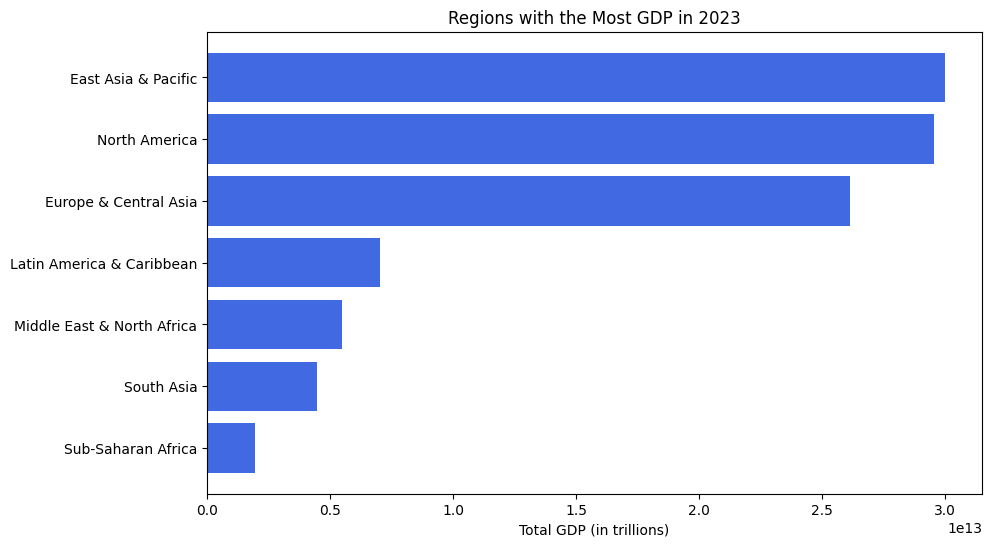

In [21]:
gdp_by_region = df[df["Year"] == "2023"].groupby("Region")["GDP"].sum().reset_index()
gdp_by_region = gdp_by_region.sort_values(by="GDP", ascending=False)

plt.figure(figsize=(10,6))
plt.barh(gdp_by_region["Region"], gdp_by_region["GDP"], color="royalblue")
plt.xlabel("Total GDP (in trillions)")
plt.title("Regions with the Most GDP in 2023")
plt.gca().invert_yaxis()
plt.show()


**Here's some Insights:**

1. **East Asia & Pacific Leads**: The region has emerged as the global economic leader, largely due to the meteoric rise of China, supported by rapid industrialization, technological innovation, and integration into global trade networks.
   
2. **North America’s Strength**: The second-highest contributor to global GDP, North America benefits from the United States' mature economy, coupled with the economic integration brought about by trade agreements like NAFTA/USMCA (Although Mexico is not listed here as part of North America; rather, part of Latin America & Caribbean).

3. **Europe & Central Asia Remains Strong**: Despite political challenges, this region holds a solid position, with Western Europe’s developed economies and Eastern Europe’s emerging markets bolstering its standing.

4. **Latin America & the Caribbean’s Role**: While lagging behind the top three, the region shows potential with significant contributions from countries like Brazil and Mexico. However, persistent challenges such as inequality and political instability hinder its progress.

5. **Middle East & North Africa’s Dependence on Oil**: The economic performance of this region is heavily influenced by oil-exporting countries, emphasizing the need for diversification to sustain growth.

6. **Challenges for South Asia and Sub-Saharan Africa**: These regions remain at the lower end of the GDP spectrum, reflecting ongoing struggles with infrastructure development, political stability, and access to global markets.

This analysis sets the stage for deeper exploration into the drivers behind these regional dynamics and the challenges that lie ahead.

## Top 15 Economies in 2001 vs. 2023

Here we compare the GDP of the top 15 economies in the years 2001 and 2023. Instead of the more common analysis of the top 10 economies, we deliberately extended the scope to the top 15 to include Mexico, enabling us to observe its relative position and performance over time. This comparison highlights significant shifts in global economic power and provides a deeper understanding of long-term trends in economic development.

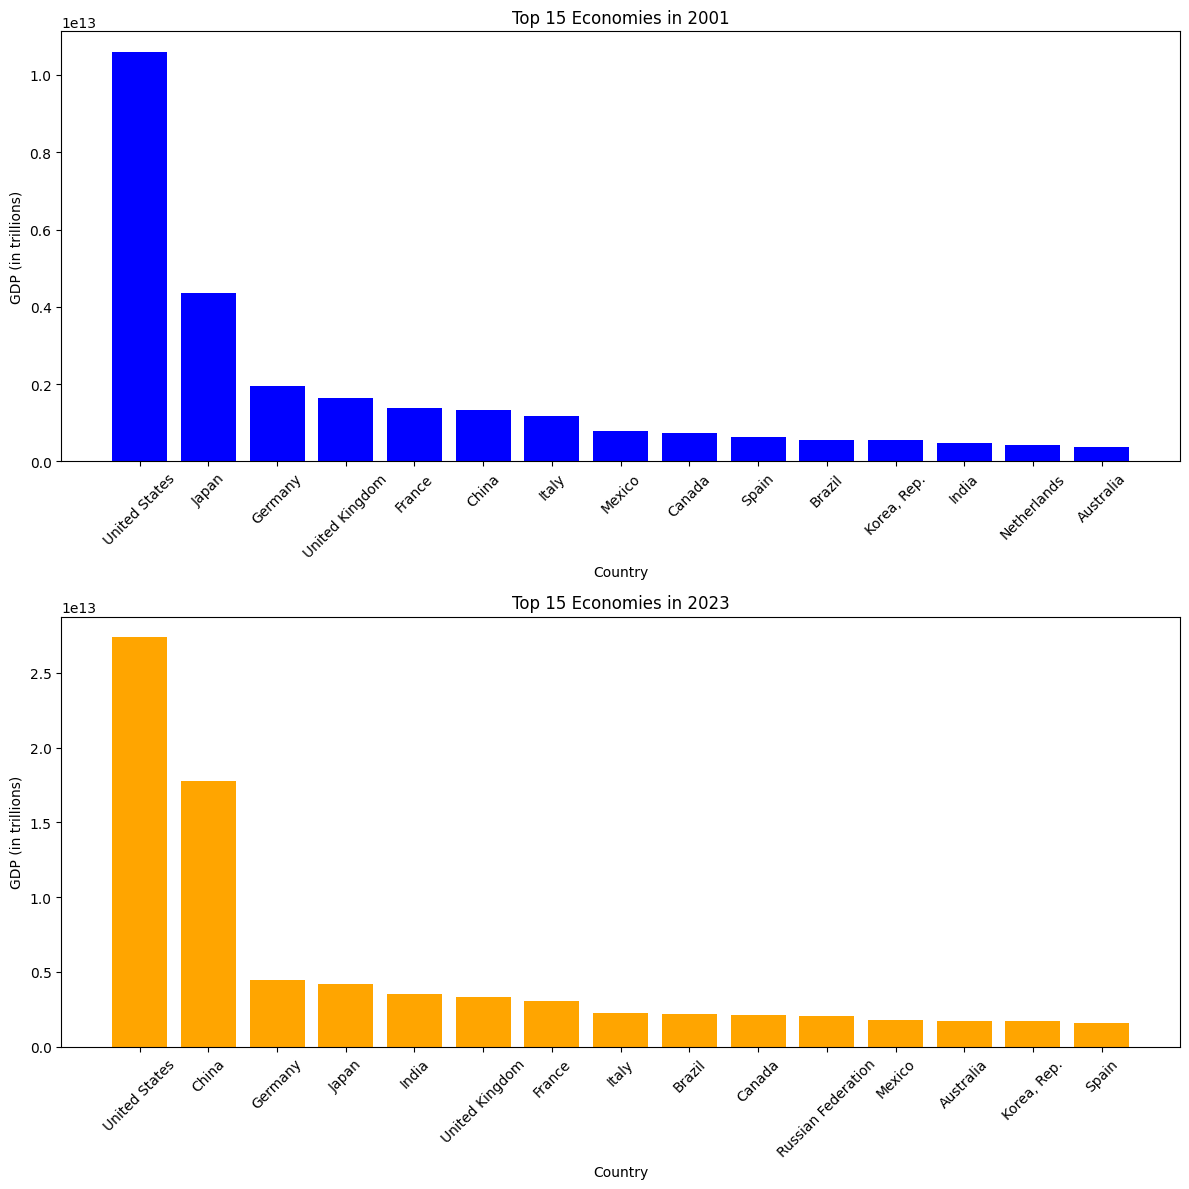

In [22]:
# Get top 15 GDP for 2001 and 2023
top_15_2001 = df_year_int[df_year_int["Year"] == 2001].sort_values(by="GDP", ascending=False).head(15)
top_15_2023 = df_year_int[df_year_int["Year"] == 2023].sort_values(by="GDP", ascending=False).head(15)

# Ensure that the GDP and Country columns exist
if "GDP" not in df.columns or "Country" not in df.columns:
    print("Error: The GDP or Country column is missing in the dataset.")
else:
    # Plot bar charts one on top of the other
    fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=False)

    # Top Chart: Top 15 in 2001
    axs[0].bar(top_15_2001["Country"], top_15_2001["GDP"], color="blue")
    axs[0].set_title("Top 15 Economies in 2001")
    axs[0].set_xlabel("Country")
    axs[0].set_ylabel("GDP (in trillions)")
    axs[0].tick_params(axis="x", rotation=45)

    # Bottom Chart: Top 15 in 2023
    axs[1].bar(top_15_2023["Country"], top_15_2023["GDP"], color="orange")
    axs[1].set_title("Top 15 Economies in 2023")
    axs[1].set_xlabel("Country")
    axs[1].set_ylabel("GDP (in trillions)")
    axs[1].tick_params(axis="x", rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.show()


**Key Observations**

1. **Dominance of the United States**: 
   - In both 2001 and 2023, the United States remains the world's largest economy. However, the gap between the U.S. and the second-largest economy has narrowed significantly, reflecting changes in global economic dynamics.

2. **China's Rapid Growth**: 
   - In 2001, China ranked 6th, trailing behind several Western economies. By 2023, it has surged to 2nd place, showcasing unprecedented economic expansion fueled by industrialization, globalization, and trade.

3. **Emergence of India**:
   - India was barely among the top 15 in 2001. By 2023, it has risen dramatically, reflecting the impact of its growing population, service-driven economy, and technological advancements.

4. **Stagnation and Decline of Traditional Powers**:
   - Japan, Germany, and the United Kingdom have retained strong positions but have not shown the same level of GDP growth as emerging markets. This reflects the maturity of their economies and slower population growth.
   - Countries like Italy and Spain have experienced relative stagnation, sliding further down the rankings.

5. **Mexico's Consistent Placement**:
   - Mexico, included as part of the top 15, has maintained a steady position. While it has not risen significantly, its resilience amidst challenges such as economic crises and dependency on trade with the U.S. deserves acknowledgment.

6. **Entry of Emerging Economies**:
   - Countries like Brazil and Russia have risen within the rankings, highlighting the increasing economic influence of BRICS nations.

The rapid ascent of economies like China and India highlights the rebalancing of economic influence from traditional Western powers to emerging markets. Mexico's inclusion in this extended analysis offers valuable insight into its economic trajectory, reflecting both its potential and challenges. These changes are a testament to globalization, population dynamics, and the impact of technological and industrial revolutions. Moving forward, this evolving economic landscape will continue to shape international relations and trade.

## GDP Distribution Per Region (Boxplot)

The previous visualization illustrated the shift in global economic power, with emerging economies like China reshaping the landscape. Transitioning to regional analysis, this boxplot highlights GDP disparities within regions in 2023.

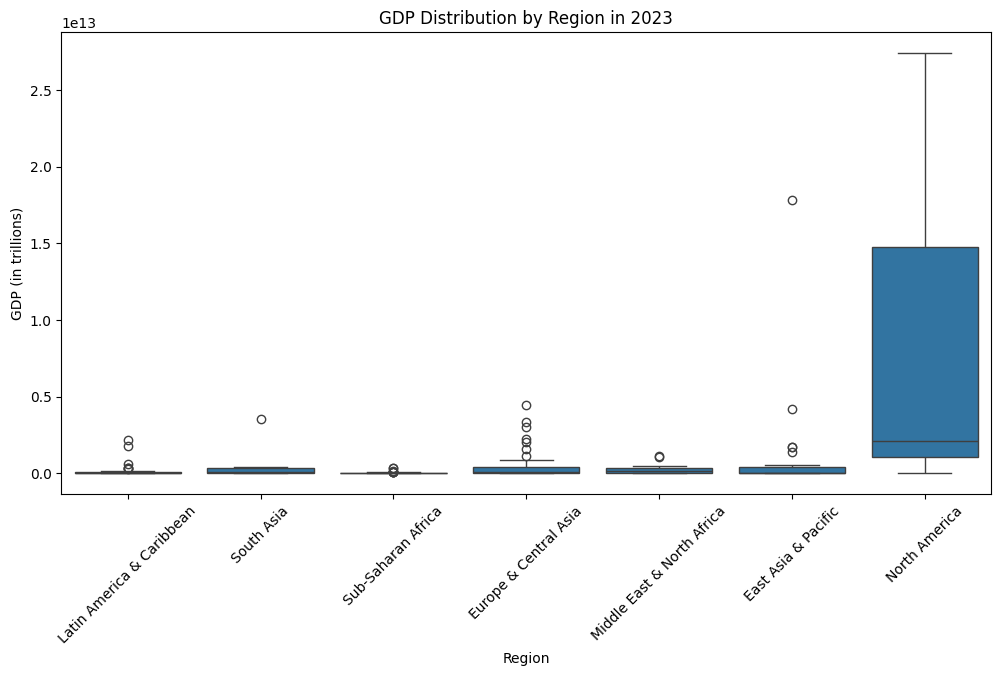

In [23]:
# Filter for 2023 GDP only
df_2023 = df[df["Year"] == "2023"]

# Plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_2023, x="Region", y="GDP")
plt.xticks(rotation=45)
plt.ylabel("GDP (in trillions)")
plt.title("GDP Distribution by Region in 2023")
plt.show()


In this boxplot, we can see that **North America dominates**, primarily driven by the United States, which accounts for the highest GDP range. In **East Asia & Pacific**, notable outliers reflect a mix of China's immense economic strength and smaller, developing economies in the region. **Europe & Central Asia** displays moderate diversity, with a noticeable gap between Western European countries and smaller nations.

In contrast, regions like **Latin America**, **South Asia**, and **Sub-Saharan Africa** exhibit relatively smaller GDP ranges, punctuated by a few high-performing outliers. These insights emphasize **North America's global leadership**, **East Asia's rapid rise**, and the **ongoing challenges faced by developing regions**. Addressing these disparities will require **tailored strategies** to support equitable economic growth and development across the globe.

## GDP Growth Trend of Major Economies (Line Chart)

Here we're tracking the GDP growth of five major economies—**United States, China, Japan, Germany, and India**—over the period from 1960 to 2023. These countries were selected due to their significant influence on global economic trends and their diverse trajectories of economic development. By analyzing these trends, we aim to highlight shifts in global economic leadership, industrialization, and the rise of emerging markets.

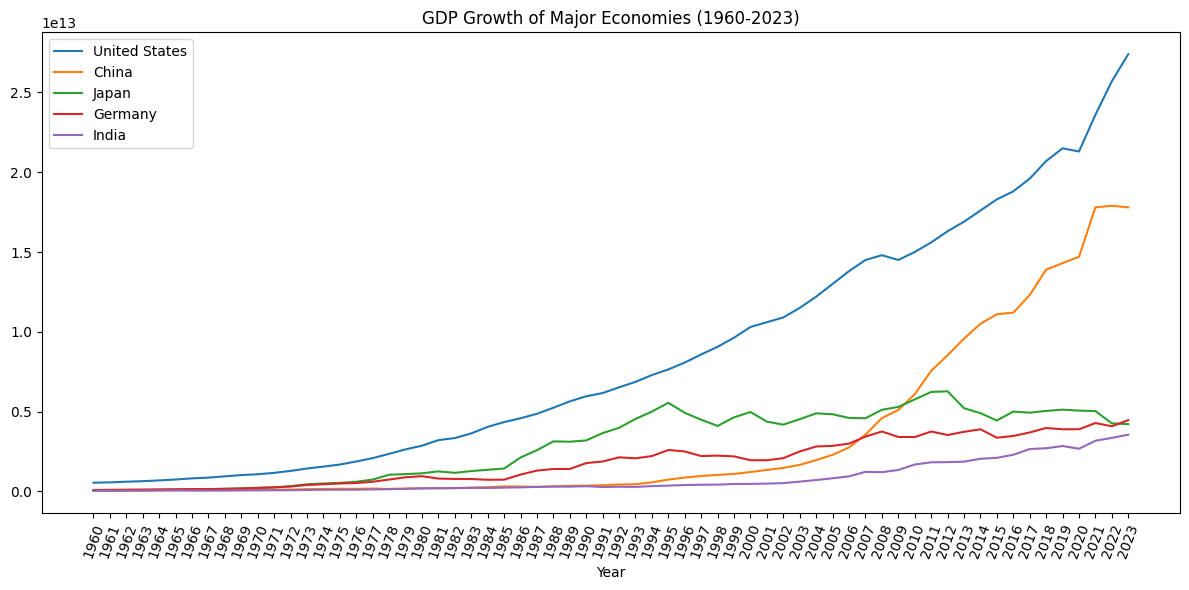

In [24]:
# Select major economies
major_economies = ["United States", "China", "Japan", "Germany", "India"]

# Filter data
df_major = df[df["Country"].isin(major_economies)]

# Plot
plt.figure(figsize=(12,6))
for country in major_economies:
    subset = df_major[df_major["Country"] == country]
    plt.plot(subset["Year"], subset["GDP"], label=country)

plt.xlabel("Year")
plt.title("GDP Growth of Major Economies (1960-2023)")
plt.legend()
plt.xticks(rotation=70)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

We can extract some insights and observations:

1. **Dominance of the United States**  
   The United States maintains a commanding lead throughout the timeline, reflecting its robust economy, technological advancements, and consistent GDP growth. The sharp increase post-2000 highlights its recovery from the dot-com bubble and resilience during the financial crisis.

2. **China's Meteoric Rise**  
   China's rapid economic growth since the late 1990s is unmistakable. This period corresponds with its industrial boom, export-driven strategies, and reforms that opened its economy to global markets. By 2023, China's GDP approaches the U.S., underscoring its global economic influence.

3. **Japan's Stagnation**  
   Japan experienced significant growth until the early 1990s, after which its GDP plateaued, reflecting the long-term impact of the economic bubble burst and an aging population. Japan's stagnation serves as a cautionary tale for developed economies facing demographic challenges.

4. **Germany as Europe's Economic Powerhouse**  
   Germany shows steady growth, positioning itself as the leading economy in Europe. Its strong industrial base and export-oriented policies are key drivers. Germany's stability demonstrates the strength of the European model despite regional crises.

5. **India's Emerging Role**  
   India's trajectory, while not as steep as China's, showcases consistent growth. The economic reforms of the 1990s and its growing IT and service sectors have contributed to this upward trend.

## GDP Trends of Emerging Markets (Line Chart)

The rise of emerging markets over the past decades highlights their growing influence in the global economy. Historically overshadowed by developed nations, these economies have shown remarkable growth, driven by globalization, technological advancements, and expanding domestic markets. This visualization focuses on the GDP trajectories of India, Brazil, Indonesia, Türkiye, and Mexico from 1989 to 2023. The timeframe starting from 1989 captures pivotal moments of liberalization, market integration, and post-Cold War shifts in global economic dynamics.

For comparative purposes, **Argentina** and **Chile** have been included. These nations, while smaller in global economic rankings, provide valuable context as major players in Latin America, offering lessons in resilience, diversification, and economic reform.

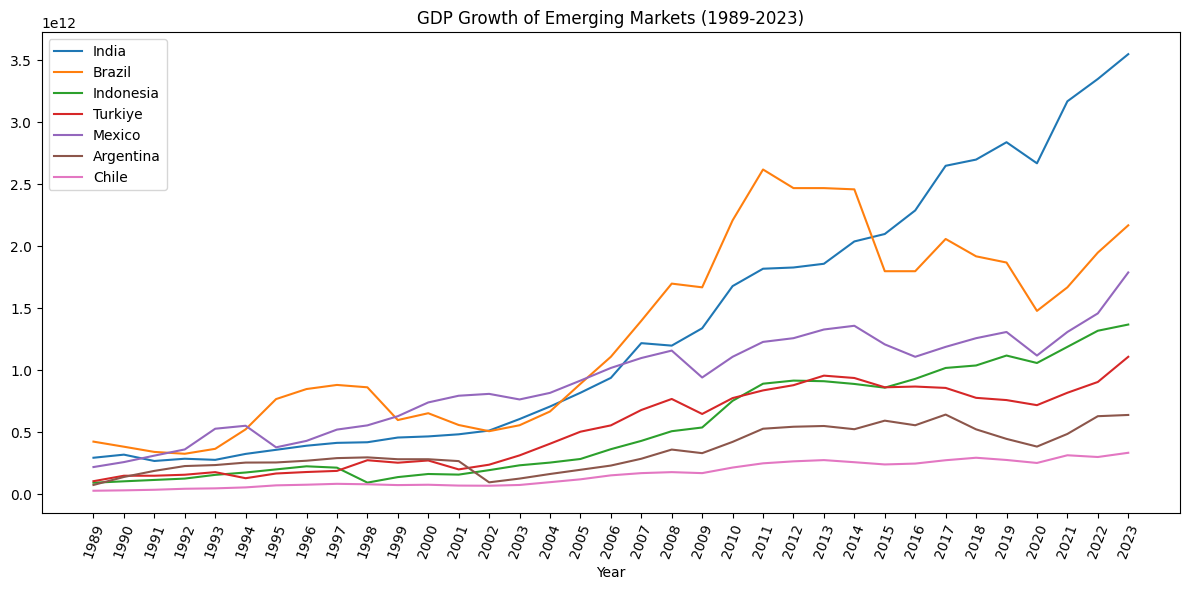

In [25]:
# Select emerging economies
emerging_economies = ["India", "Brazil", "Indonesia", "Turkiye", "Mexico", "Argentina", "Chile"]

# Filter data for emerging economies and years >= 1989
df_emerging = df[(df["Country"].isin(emerging_economies)) & (df["Year"].astype(int) >= 1989)]

# Plot
plt.figure(figsize=(12, 6))
for country in emerging_economies:
    subset = df_emerging[df_emerging["Country"] == country]
    plt.plot(subset["Year"], subset["GDP"], label=country)

plt.xlabel("Year")
plt.title("GDP Growth of Emerging Markets (1989-2023)")
plt.legend()
plt.xticks(rotation=70)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

Here's some observations and insights:

- **India** has experienced exponential growth since the early 2000s, fueled by an expanding workforce, technological advancements, and rapid industrialization.
  
- **Brazil**, despite steady growth, has faced volatility, particularly in the mid-2010s, due to political instability and reliance on commodity exports.
  
- **Indonesia** demonstrates consistent growth, leveraging abundant natural resources and a growing consumer market.
  
- **Türkiye** experienced growth surges in the early 2000s, though more recent years highlight challenges related to inflation and regional geopolitical tensions.
  
- **Mexico** shows steady progress, bolstered by its integration into North American markets through agreements like **NAFTA/USMCA** and its diversified economy.
  
- **Argentina** reflects a turbulent economic history, marked by cycles of growth and contraction due to **political instability**, **currency crises**, and dependency on agricultural exports. Its resilience underscores its potential for recovery with stable policies.
  
- **Chile** stands out as a consistent performer, underpinned by **economic liberalization** and a leading role in global copper exports.

The decision to include Argentina and Chile enriches the analysis by illustrating two contrasting paths within the Latin American context: Argentina's challenges with economic volatility and Chile's disciplined approach to growth. The starting point of 1989 captures a critical era of global economic restructuring, allowing for a deeper understanding of how emerging markets have adapted and flourished in the post-Cold War world.

As these economies continue to evolve, they are set to redefine global trade, innovation, and geopolitics, underscoring their role as engines of growth in an increasingly interconnected world.

## Fastest-Growing Economies from 2000-2023

The chart highlights the top 10 fastest-growing economies between 2000 and 2023, measured by total GDP growth percentage. 

Understanding these countries' growth trajectories is essential to identifying emerging markets, analyzing successful economic policies, and assessing potential global economic shifts. The prominence of lesser-discussed nations emphasizes how resource exploitation, industrial diversification, and political strategies can catapult economies onto the global stage.

You might be asking why This Data Matters: This list provides a snapshot of how diverse factors—natural resources, industrial policies, and strategic reforms—can drive significant GDP growth. 

For investors, policymakers, and analysts, it underscores the importance of monitoring lesser-highlighted nations that may play a more prominent role in future global economic dynamics. 

Guyana, in particular, serves as a case study in how the discovery of resources can rapidly transform an economy, provided governance and equitable distribution are prioritized.

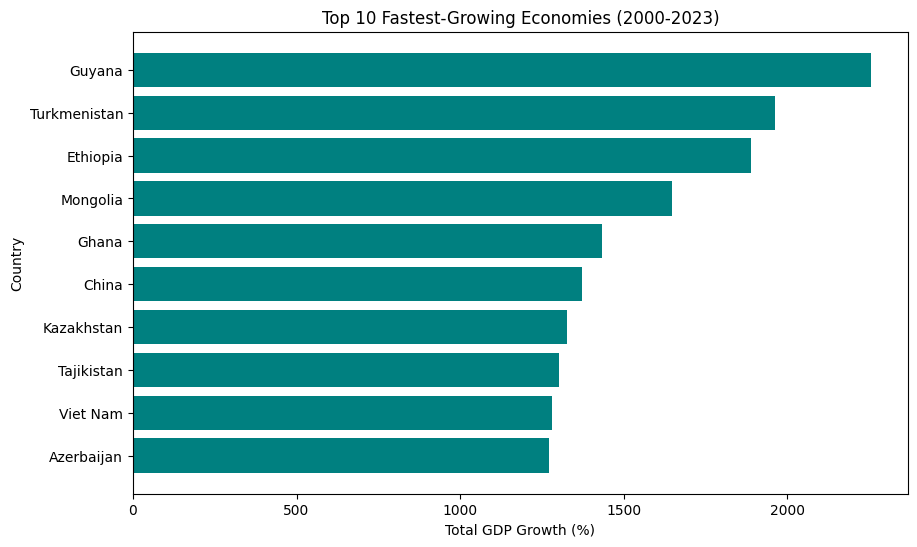

In [26]:
# Compute total GDP growth from 2000 to 2023
df_growth_2000_2023 = df_year_int[df_year_int["Year"].isin([2000, 2023])].pivot(index="Country", columns="Year", values="GDP")
df_growth_2000_2023["Growth_Percent"] = ((df_growth_2000_2023[2023] - df_growth_2000_2023[2000]) / df_growth_2000_2023[2000]) * 100

# Get top 10 fastest-growing economies
fastest_growing = df_growth_2000_2023.sort_values("Growth_Percent", ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(fastest_growing.index, fastest_growing["Growth_Percent"], color="teal")
plt.xlabel("Total GDP Growth (%)")
plt.ylabel("Country")
plt.title("Top 10 Fastest-Growing Economies (2000-2023)")
plt.gca().invert_yaxis()
plt.show()

Let's delve into each one of these interesting cases:

- **Guyana**: Leading this list with explosive growth, Guyana's economic ascent is largely tied to its recent discovery of vast offshore oil reserves. Since 2015, ExxonMobil and other corporations have capitalized on these resources, propelling Guyana's GDP growth. While oil production accounts for much of this boom, the challenge lies in managing this newfound wealth sustainably and ensuring broad-based economic benefits, given its relatively small population.

- **Turkmenistan**: Its growth is fueled by significant natural gas reserves, primarily exported to China. Turkmenistan's heavy reliance on energy exports exposes it to global market fluctuations, but its strategic partnerships and infrastructure projects have bolstered its GDP expansion.

- **Ethiopia**: Driven by large-scale infrastructure projects and a shift towards industrialization, Ethiopia has demonstrated consistent growth. Its government-led policies have prioritized sectors such as manufacturing and agriculture, transforming it into one of Africa’s most dynamic economies. Challenges remain, however, in political stability and equitable development.

- **Mongolia**: Rich in mineral resources such as copper and coal, Mongolia’s growth is closely tied to its extractive industries. Proximity to China, a major importer of these resources, has been a key factor in sustaining its economic rise.

- **Ghana**: As one of Africa’s fastest-growing economies, Ghana benefits from gold, cocoa, and oil exports. Sound fiscal management and economic reforms have further propelled its growth, making it a model for other nations on the continent.

- **China**: While its inclusion might not be surprising, China's sustained growth since the early 2000s is a testament to its robust industrial base, export-oriented policies, and innovations in technology. Its global influence continues to reshape the world economy.

- **Kazakhstan**: With abundant energy resources, including oil and uranium, Kazakhstan has leveraged its strategic location in Central Asia to enhance trade and investment. Infrastructure development, particularly under China's Belt and Road Initiative, has also contributed to its rise.

- **Tajikistan**: Economic growth in Tajikistan stems from remittances, hydropower development, and its agricultural sector. Its strategic location as part of Central Asia has also enabled trade ties with neighboring countries.

- **Vietnam**: Vietnam’s integration into global supply chains has been pivotal. Its shift towards manufacturing, particularly electronics and textiles, coupled with trade agreements, has turned it into a regional economic powerhouse.

- **Azerbaijan**: Like several others on this list, Azerbaijan’s growth is anchored in its oil and gas reserves. Strategic reforms and infrastructure investments have diversified its economy, though energy still plays a dominant role.

# Forecasting the Future: Machine Learning Predictions for Global GDP

In this section, we delve into **predictive analytics**, utilizing machine learning models to forecast economic trends and evaluate potential growth scenarios. Our focus is on analyzing GDP data to predict future economic outcomes and understand the implications of these trends for policymaking, businesses, and global trade. 

By employing advanced methodologies such as **Holt-Winters exponential smoothing** and **machine learning models like XGBoost**, we aim to provide a forward-looking perspective on economic performance while remaining aware of the inherent limitations of these approaches.

Our methodology centers around **data-driven modeling**, where past economic trends inform predictions about future growth. These forecasts are designed to provide practical applications for businesses and policymakers, helping them anticipate economic shifts, align strategies, and make informed decisions. While GDP is a strong indicator of economic health, we acknowledge that it offers only a partial view of the broader economic landscape. This section emphasizes the utility of our models while critically examining their limitations and areas for potential refinement.

## Limitations of Our Models and Areas for Future Research

While our approach provides valuable insights, it is not without limitations. It is crucial to recognize that these models are **not crystal balls**. They offer an informed projection based on available data but remain inherently uncertain due to the complexity of global economies and the lack of more granular, multidimensional data.

Here's the main limitations:

1. **Dependence on GDP as a Sole Variable**: By relying exclusively on GDP, the models fail to account for other critical factors influencing economic growth, such as unemployment rates, inflation, trade balances, or technological advancements. This creates a **narrow lens** through which to view future economic scenarios.
   
2. **Simplistic Assumptions**: The **Holt-Winters model**, for instance, assumes that trends and seasonal patterns from the past will continue unchanged into the future, overlooking external shocks like geopolitical events, pandemics, or natural disasters. Similarly, **XGBoost**, while robust, relies heavily on the quality and diversity of the training data. With GDP as the only variable, the model's scope is inherently restricted.

3. **Shortcomings in Multivariable Complexity**: Real-world economies are influenced by complex interactions of factors that extend beyond GDP. A lack of **integrated datasets** limits the ability of these models to capture the nuanced dynamics of global economic systems.

4. **Forecast Accuracy Over Time**: Long-term forecasts (beyond 10 years) tend to lose reliability due to compounding uncertainties. Economic conditions are highly dynamic, and even the best models struggle to predict **long-term disruptions** accurately.

Future research should explore integrating **more diverse datasets** to capture the multidimensional nature of economies. Adding indicators like trade volume, technological innovation indices, and employment statistics could enrich the analysis. Furthermore, testing advanced models, such as **recurrent neural networks (RNNs)** or **transformers**, might yield improved forecasts by capturing sequential dependencies more effectively.

By addressing these limitations, we can enhance the reliability and scope of predictive analytics, ensuring more robust insights for policymakers and businesses alike.

Let's start by predicting how our world will look like in 10 years.

## Predicting the Next Top 10 Global Economies in 2035

We're about to illustrate the dynamic shifts in the global economic landscape. Utilizing **Polynomial Regression** and **XGBoost Regression**, we attempt to forecast the top 10 economies in 2035, relying on growth trajectories derived from historical GDP trends.

In [27]:
# Filter and prepare the dataset
gdp_data = df1990_dropped[["Country", "Year", "GDP"]]

# Create an empty DataFrame to store results
predictions_2035 = []

# Loop through each country in the dataset
for country in gdp_data["Country"].unique():
    country_data = gdp_data[gdp_data["Country"] == country]
    X = country_data["Year"].values.reshape(-1, 1)
    y = country_data["GDP"].values

    # ---- Polynomial Regression ----
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)
    gdp_poly_2035 = poly_model.predict(poly.transform([[2035]]))[0]

    # ---- XGBoost Regression ----
    xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1)
    xgb_model.fit(X, y)
    gdp_xgb_2035 = xgb_model.predict(np.array([[2035]]))[0]

    # Store results
    predictions_2035.append({
        "Country": country,
        "GDP_2035_Poly": gdp_poly_2035,
        "GDP_2035_XGBoost": gdp_xgb_2035
    })

**Why Polynomial Regression and XGBoost?**  
- **Polynomial Regression** excels at capturing long-term trends, offering a perspective on gradual economic shifts and their future implications.  
- **XGBoost Regression**, renowned for its precision, incorporates a data-driven approach to forecasting, minimizing prediction errors and enhancing model reliability.

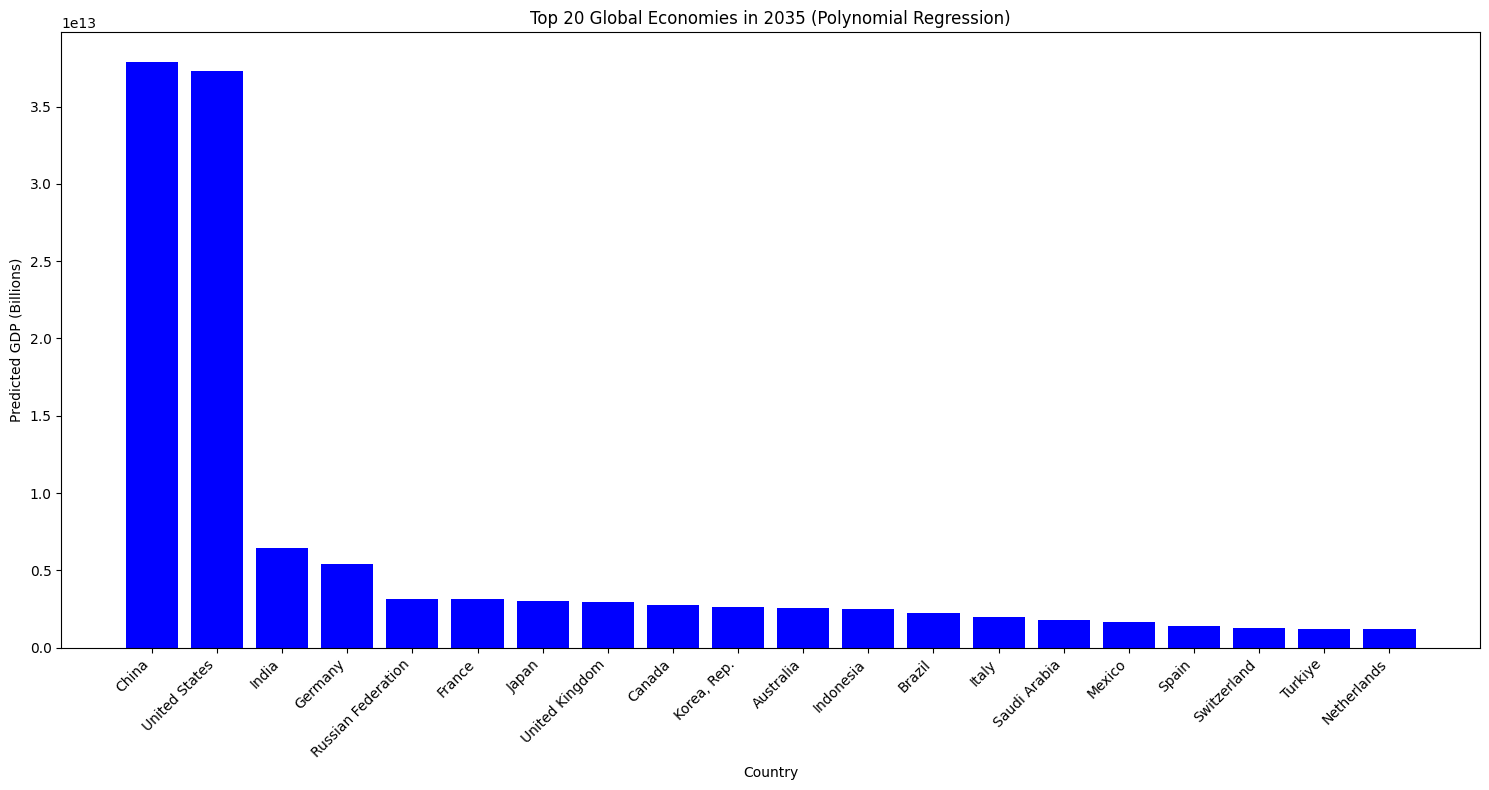

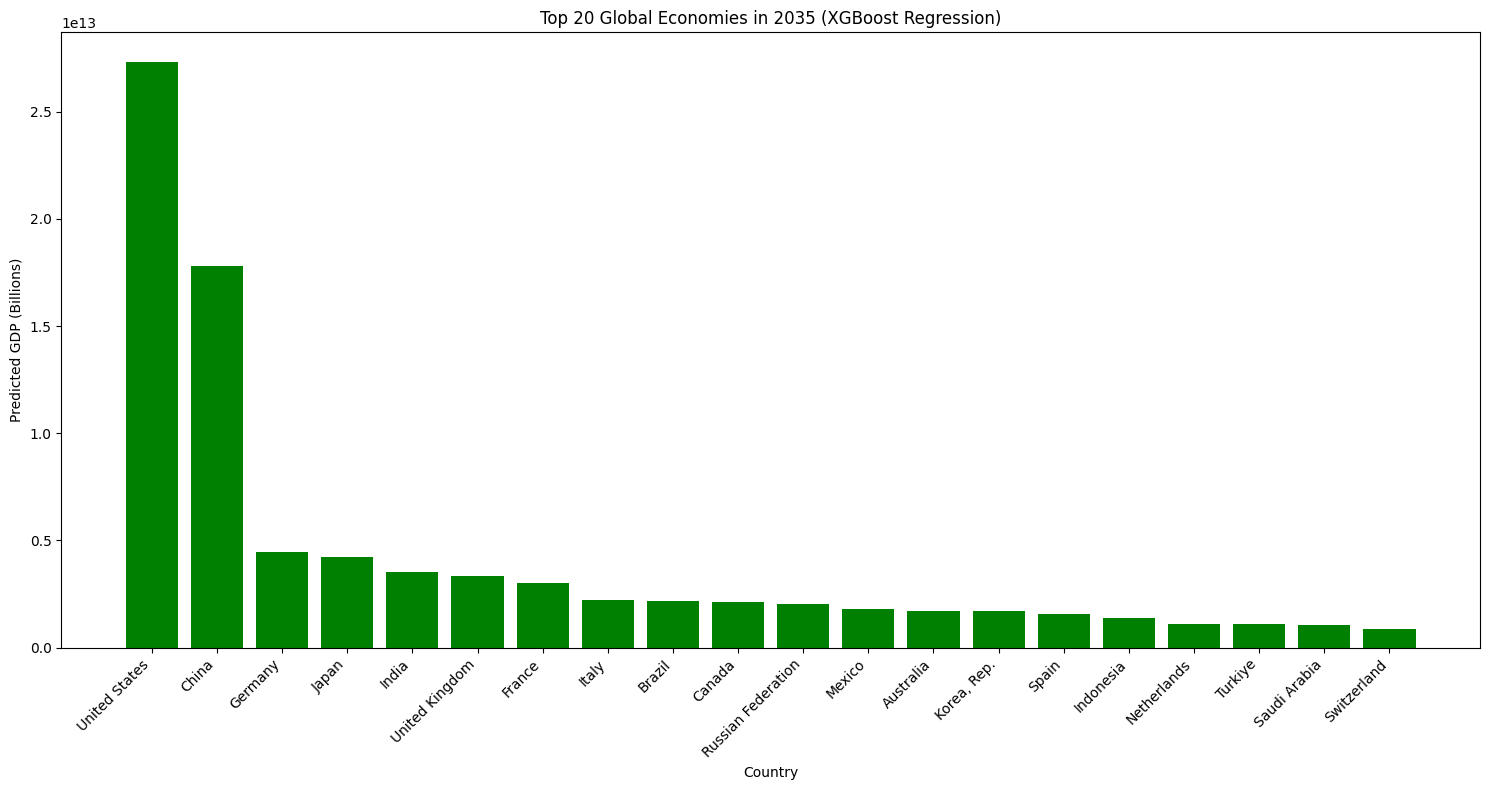

In [28]:


# Convert results to DataFrame
predictions_2035_df = pd.DataFrame(predictions_2035)

# Rank countries by predicted GDP for both models
top20_poly = predictions_2035_df.sort_values(by="GDP_2035_Poly", ascending=False).head(20)
top20_xgb = predictions_2035_df.sort_values(by="GDP_2035_XGBoost", ascending=False).head(20)

# ---- Visualization: Top 20 by Polynomial Regression ----
plt.figure(figsize=(15, 8))
plt.bar(top20_poly["Country"], top20_poly["GDP_2035_Poly"], color="blue")
plt.title("Top 20 Global Economies in 2035 (Polynomial Regression)")
plt.xlabel("Country")
plt.ylabel("Predicted GDP (Billions)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ---- Visualization: Top 20 by XGBoost ----
plt.figure(figsize=(15, 8))
plt.bar(top20_xgb["Country"], top20_xgb["GDP_2035_XGBoost"], color="green")
plt.title("Top 20 Global Economies in 2035 (XGBoost Regression)")
plt.xlabel("Country")
plt.ylabel("Predicted GDP (Billions)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Our predictive analysis aligns with several reputable forecasts regarding the top global economies in 2035. Consistently, China and the United States are projected to lead, with India securing the third position. 

For instance, the **Lowy Institute's Asia Power Index** anticipates China's GDP reaching approximately $51.5 trillion, the U.S. at $33.8 trillion, and India at $26.6 trillion by 2035.

Our models also highlight the ascent of Indonesia, Brazil, and Mexico into the top ten economies. The PwC **"World in 2050"** report supports this trajectory, projecting that by 2050, six of the seven largest economies will be emerging markets, with Indonesia and Mexico making significant gains.

However, it's important to note that our forecasts are based solely on historical GDP data. In contrast, institutions like the World Bank incorporate a broader range of variables, including technological advancements, demographic shifts, and policy changes, to provide more comprehensive projections. 

In summary, while our predictions align with several reputable forecasts, determining which model better represents the future economic landscape depends on the context and purpose of the analysis. **The Polynomial Regression model** effectively captures long-term trends and is particularly useful for understanding the broader trajectory of economies over time. However, its simplicity can lead to overgeneralizations, especially for economies undergoing significant structural changes. 

On the other hand, **the XGBoost model** provides a more nuanced and accurate short- to medium-term forecast by leveraging its ability to handle non-linear relationships and interactions in data. Nevertheless, it may struggle to capture the full spectrum of macroeconomic dynamics due to its reliance on historical GDP data alone.

Both models, while insightful, are inherently limited by the exclusive use of GDP as a variable. Future analyses should integrate additional factors, such as technological advancements, demographic shifts, and geopolitical developments, to enhance predictive accuracy and reliability. By combining the strengths of these models with a broader range of data, we can develop more comprehensive and actionable economic forecasts that better reflect the complexities of the global economy.

_Sources:_
- Lowly Institute's Asia Power Index: https://power.lowyinstitute.org/data/future-resources/economic-size-2035/gdp-2035/?utm_source=chatgpt.com
- PwC "The World in 2050": https://www.pwc.com/gx/en/research-insights/economy/the-world-in-2050.html?utm_source=chatgpt.com


## Economic Blocks in 2035: Analysis and Predictions

The global economic landscape is shaped by key economic alliances such as BRICS, G7, and ASEAN. These economic blocks represent a diverse spectrum of economies, with varying growth rates and trajectories influenced by trade agreements, industrial policies, and demographic dynamics. By forecasting their GDP up to 2035, we aim to gain insights into how these economic alliances may evolve and impact global markets. To achieve this, we employed **Polynomial Regression**, which proved more suitable than XGBoost for this analysis as it captures long-term growth trends effectively, aligning better with the historical patterns observed in our data.

This will be the primary model we use moving forward.

In [29]:
# Step 1: Define Economic Blocks
economic_blocks = {
    "BRICS": ["Brazil", "Russia", "India", "China", "South Africa"],
    "G7": ["United States", "United Kingdom", "Canada", "France", "Germany", "Italy", "Japan"],
    "ASEAN": ["Indonesia", "Malaysia", "Philippines", "Singapore", "Thailand", 
              "Brunei", "Vietnam", "Laos", "Myanmar", "Cambodia"]
}

# Step 2: Filter and Aggregate Data by Block
block_gdp_data = []
for block, countries in economic_blocks.items():
    block_data = df1990_dropped[df1990_dropped["Country"].isin(countries)]
    aggregated_gdp = block_data.groupby("Year")["GDP"].sum().reset_index()
    aggregated_gdp["Block"] = block
    block_gdp_data.append(aggregated_gdp)

# Combine all blocks into a single DataFrame
block_gdp_data = pd.concat(block_gdp_data, ignore_index=True)

# Step 3: Apply Polynomial Regression for Each Block
predictions_block = []
for block in block_gdp_data["Block"].unique():
    block_data = block_gdp_data[block_gdp_data["Block"] == block]
    X = block_data["Year"].values.reshape(-1, 1)
    y = block_data["GDP"].values

    # Fit Polynomial Regression
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)

    # Predict GDP from 2024 to 2035
    future_years = np.arange(2024, 2036).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    gdp_predictions = poly_model.predict(future_years_poly)

    # Store results
    predictions_block.append(
        pd.DataFrame(
            {
                "Year": future_years.flatten(),
                "Block": block,
                "Predicted_GDP": gdp_predictions,
            }
        )
    )

# Combine predictions into one DataFrame
predictions_block = pd.concat(predictions_block, ignore_index=True)

# Step 5: Insights for 2035
print("GDP Predictions for Economic Blocks in 2035:")
print(predictions_block[predictions_block["Year"] == 2035])

GDP Predictions for Economic Blocks in 2035:
    Year  Block  Predicted_GDP
11  2035  BRICS   4.710665e+13
23  2035     G7   5.652259e+13
35  2035  ASEAN   5.884810e+12


In 2035, the predictions showcase a distinct hierarchy among the blocks:

- **G7** leads the global stage with a projected GDP of approximately **56.52 trillion USD**, maintaining its dominance as an aggregate of advanced economies. This reflects the enduring economic strength of nations like the United States, Germany, and Japan.
  
- **BRICS**, with its mix of emerging powerhouses such as China and India, is predicted to reach a GDP of **47.10 trillion USD**, closely trailing the G7. This highlights the rapid industrialization and economic dynamism within the block, driven largely by China’s manufacturing capacity and India's expanding markets.
  
- **ASEAN**, though smaller in scale, is forecasted to grow steadily, with a GDP of **5.88 trillion USD** by 2035. This underscores the rising significance of Southeast Asian economies, bolstered by regional integration and trade liberalization efforts.

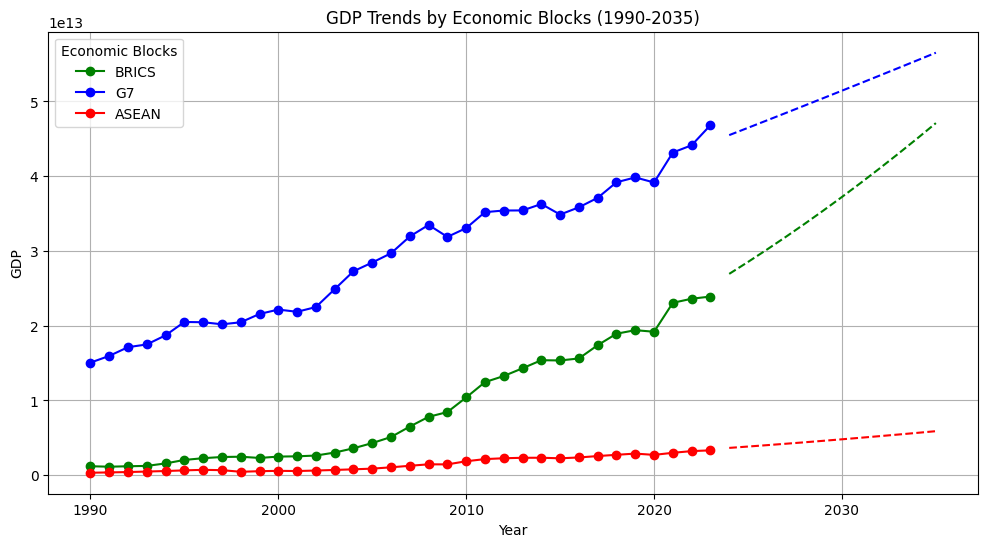

In [30]:
# Step 4: Visualization
plt.figure(figsize=(12, 6))

# Define colors for each block
colors = {"BRICS": "green", "G7": "blue", "ASEAN": "red"}

for block in block_gdp_data["Block"].unique():
    # Historical Data
    historical_data = block_gdp_data[block_gdp_data["Block"] == block]
    plt.plot(
        historical_data["Year"],
        historical_data["GDP"],
        label=f"{block}",
        marker="o",
        color=colors[block]
    )

    # Predicted Data
    predicted_data = predictions_block[predictions_block["Block"] == block]
    plt.plot(
        predicted_data["Year"],
        predicted_data["Predicted_GDP"],
        linestyle="dashed",
        color=colors[block]
    )

plt.title("GDP Trends by Economic Blocks (1990-2035)")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend(title="Economic Blocks")
plt.grid()
plt.show()

Let's delve into some insights from our analysis:

- **The G7’s Sustained Dominance**: Despite the relative stagnation in some member states, the G7’s collective economic power remains unmatched. This is a testament to its robust financial systems, technological innovation, and high levels of human capital. However, its growth rate appears to be stabilizing, reflecting the economic maturity of its members.

- **BRICS on the Rise**: The BRICS nations continue to challenge traditional economic hierarchies, with a growth trajectory that narrows the gap with the G7. China and India, in particular, are key drivers of this growth, leveraging their large populations and expanding industrial bases. However, internal disparities and geopolitical tensions within the block could influence its cohesion and overall performance.

- **ASEAN’s Strategic Growth**: ASEAN’s forecasted growth highlights the block’s increasing relevance in global trade. As Southeast Asia continues to attract investment and strengthen its supply chain networks, it positions itself as a critical hub in the global economy. Yet, its relatively smaller GDP compared to BRICS and G7 suggests there is room for further economic integration and policy harmonization.

The forecasts for 2035 align closely with projections from reputable sources, highlighting the emergence of a more multipolar global economy. According to our analysis, the **G7 maintains its dominance**, with a projected GDP of **$56.52 trillion USD**. This aligns with global economic predictions, which emphasize the continued strength of advanced economies like the United States, Germany, and Japan. Reputable sources, such as the World Bank itself and Visual Capitalist, also project the G7 to remain a significant player in the global economy due to its technological advancements, high human capital, and robust financial systems.

However, our analysis underscores the **rise of BRICS**, which narrows the gap with the G7, reaching a forecasted GDP of **$47.10 trillion USD** by 2035. External sources corroborate this trajectory, suggesting that BRICS could potentially surpass the G7 by 2050, driven by the rapid industrialization and population growth in China and India. These findings reflect a significant **shift in global economic influence towards emerging markets**, with BRICS increasingly challenging traditional economic powerhouses.

In the case of **ASEAN**, our forecast of a GDP of **$5.88 trillion USD** highlights the block’s steady growth, supported by regional integration and trade liberalization. External sources agree on ASEAN’s rising importance as a global trade hub, emphasizing its role in attracting investments and strengthening supply chain networks. However, both our findings and external sources suggest that ASEAN’s overall GDP remains relatively modest compared to BRICS and the G7, indicating room for further economic integration and policy alignment to unlock its full potential.

Overall, our findings and those of reputable sources converge in illustrating a global economy shaped by both **traditional powerhouses and emerging markets**. While the G7 continues to lead, the rise of BRICS signifies a redistribution of economic influence, and ASEAN’s growth underscores the critical role of regional cooperation in the 21st century. Policymakers and businesses must adopt adaptive strategies to navigate this evolving landscape, considering technological advancements, demographic trends, and geopolitical developments that could redefine economic trajectories.

_Sources:_
- **Visual Capitalist**: Charted: Comparing the GDP of BRICS and the G7 Countries": https://www.visualcapitalist.com/charted-comparing-the-gdp-of-brics-and-the-g7-countries/
- **Lowy Institute Asia Power Index**: GDP forecast 2035 data": https://power.lowyinstitute.org/data/future-resources/economic-size-2035/gdp-2035/
- **S&P Global**: ASEAN economic outlook in 2024": https://www.spglobal.com/en/research-insights/articles/asean-economic-outlook-in-2024
- **PwC**: The World in 2050": https://www.pwc.com/gx/en/issues/economy/the-world-in-2050.html
- **ERIA**: Whither the ASEAN Economic Community in 2025–2035?": https://www.eria.org/publications/whither-the-asean-economic-community-in-2025-2035/

## Trade Agreements

The trade agreements analyzed in this section highlight the economic dynamics within significant global alliances. By forecasting GDP up to 2035, we aim to assess how these economic blocs may evolve and influence global markets. 

In [31]:
# Step 1: Define Trade Agreements (Updated)
trade_agreements = {
    "USMCA": ["United States", "Mexico", "Canada"],
    "EU": ["Germany", "France", "Italy", "Spain", "Netherlands", "Belgium", "Sweden",
           "Austria", "Denmark", "Finland", "Greece", "Ireland", "Portugal", "Poland", 
           "Czech Republic", "Hungary", "Romania", "Slovakia", "Slovenia", "Bulgaria", 
           "Lithuania", "Latvia", "Estonia", "Croatia", "Luxembourg", "Malta"],
    "ASEAN": ["Indonesia", "Malaysia", "Philippines", "Singapore", "Thailand", 
              "Brunei", "Vietnam", "Laos", "Myanmar", "Cambodia"],
    "Mercosur": ["Argentina", "Brazil", "Paraguay", "Uruguay"],
    "SAARC": ["India", "Pakistan", "Bangladesh", "Sri Lanka", "Nepal", "Maldives", "Bhutan", "Afghanistan"],
    "China": ["China"]  # Standalone entity
}

# Step 2: Aggregate GDP by Trade Agreement
trade_gdp_data = []
for trade, countries in trade_agreements.items():
    trade_data = df1990_dropped[df1990_dropped["Country"].isin(countries)]
    aggregated_gdp = trade_data.groupby("Year")["GDP"].sum().reset_index()
    aggregated_gdp["Trade_Agreement"] = trade
    trade_gdp_data.append(aggregated_gdp)

# Combine all agreements into a single DataFrame
trade_gdp_data = pd.concat(trade_gdp_data, ignore_index=True)

# Step 3: Apply Polynomial Regression for Each Trade Agreement
predictions_trade = []
for trade in trade_gdp_data["Trade_Agreement"].unique():
    trade_data = trade_gdp_data[trade_gdp_data["Trade_Agreement"] == trade]
    X = trade_data["Year"].values.reshape(-1, 1)
    y = trade_data["GDP"].values

    # Fit Polynomial Regression
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)

    # Predict GDP from 2024 to 2035
    future_years = np.arange(2024, 2036).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    gdp_predictions = poly_model.predict(future_years_poly)

    # Store results
    predictions_trade.append(
        pd.DataFrame(
            {
                "Year": future_years.flatten(),
                "Trade_Agreement": trade,
                "Predicted_GDP": gdp_predictions,
            }
        )
    )

# Combine predictions into one DataFrame
predictions_trade = pd.concat(predictions_trade, ignore_index=True)

# Step 5: Insights for 2035
print("GDP Predictions for Trade Agreements in 2035:")
print(predictions_trade[predictions_trade["Year"] == 2035])


GDP Predictions for Trade Agreements in 2035:
    Year Trade_Agreement  Predicted_GDP
11  2035           USMCA   4.168242e+13
23  2035              EU   1.947897e+13
35  2035           ASEAN   5.884810e+12
47  2035        Mercosur   3.425386e+12
59  2035           SAARC   8.290793e+12
71  2035           China   3.790717e+13


In addition to traditional trade agreements such as **USMCA**, **EU**, **ASEAN**, and **Mercosur**, we included **China** as a standalone entity for comparison, given its unparalleled role as a global economic powerhouse. Furthermore, we incorporated **SAARC** to account for India and its neighboring countries, which share cultural affinities and form a cohesive regional block with significant growth potential.

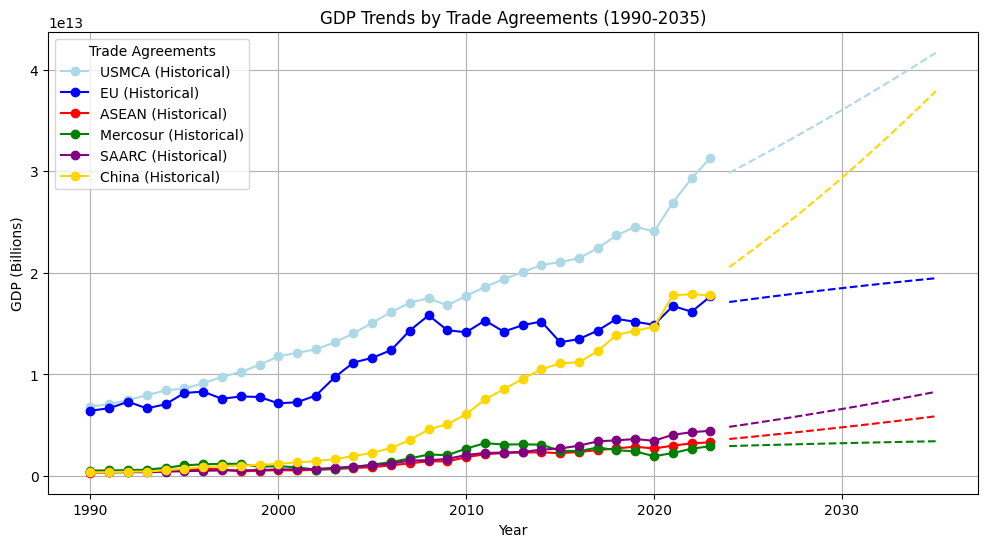

In [32]:
# Step 4: Visualization
plt.figure(figsize=(12, 6))
colors = {
    "USMCA": "lightblue",
    "EU": "blue",
    "ASEAN": "red",
    "Mercosur": "green",
    "SAARC": "purple",
    "China": "gold"
}
for trade in trade_gdp_data["Trade_Agreement"].unique():
    # Historical Data
    historical_data = trade_gdp_data[trade_gdp_data["Trade_Agreement"] == trade]
    plt.plot(historical_data["Year"], historical_data["GDP"], label=f"{trade} (Historical)", color=colors[trade], marker="o")

    # Predicted Data
    predicted_data = predictions_trade[predictions_trade["Trade_Agreement"] == trade]
    plt.plot(predicted_data["Year"], predicted_data["Predicted_GDP"], linestyle="dashed", color=colors[trade])

plt.title("GDP Trends by Trade Agreements (1990-2035)")
plt.xlabel("Year")
plt.ylabel("GDP (Billions)")
plt.legend(title="Trade Agreements")
plt.grid()
plt.show()

The forecasts reveal intriguing insights. The **USMCA** bloc is projected to lead the trade agreements in GDP, reaching approximately **$41.68 trillion** by 2035, driven by the United States' robust economy. **China**, analyzed independently, emerges as the second-largest economic force with a forecasted GDP of **$37.91 trillion**, underscoring its unmatched growth trajectory and industrial strength. The **EU**, despite its stable industrial base, shows slower growth relative to other blocks, with a forecasted GDP of **$19.47 trillion**.

Among emerging economies, **SAARC** demonstrates significant potential, with a forecasted GDP of **$8.29 trillion**, reflecting India’s growth and its regional influence. Similarly, **ASEAN** and **Mercosur** showcase their economic resilience with forecasted GDPs of **$5.88 trillion** and **$3.42 trillion**, respectively, driven by their trade networks and demographic advantages.

These forecasts highlight the diverse growth trajectories across trade agreements, emphasizing the varying economic strengths and challenges within these blocks. While traditional economic alliances like the USMCA and EU maintain their dominance, emerging players like SAARC and ASEAN are poised to reshape the global economic order, driven by their expanding industries, young populations, and regional integration.

## Regions

The global economic landscape is often analyzed through regional dynamics, where each region’s economic trajectory is influenced by unique factors such as resource distribution, trade partnerships, demographic growth, and industrial strategies. 

Our predictions reveal significant variations among the regions.

In [33]:
# Step 1: Aggregate GDP by Region
region_gdp_data = df1990_dropped.groupby(["Region", "Year"])["GDP"].sum().reset_index()

# Step 2: Apply Polynomial Regression for Each Region
predictions_region = []
for region in region_gdp_data["Region"].unique():
    region_data = region_gdp_data[region_gdp_data["Region"] == region]
    X = region_data["Year"].values.reshape(-1, 1)
    y = region_data["GDP"].values

    # Fit Polynomial Regression
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y)

    # Predict GDP from 2024 to 2035
    future_years = np.arange(2024, 2036).reshape(-1, 1)
    future_years_poly = poly.transform(future_years)
    gdp_predictions = poly_model.predict(future_years_poly)

    # Store results
    predictions_region.append(
        pd.DataFrame(
            {
                "Year": future_years.flatten(),
                "Region": region,
                "Predicted_GDP": gdp_predictions,
            }
        )
    )

# Combine predictions into one DataFrame
predictions_region = pd.concat(predictions_region, ignore_index=True)

# Step 4: Insights for 2035
print("GDP Predictions for Regions in 2035:")
print(predictions_region[predictions_region["Year"] == 2035])


GDP Predictions for Regions in 2035:
    Year                      Region  Predicted_GDP
11  2035         East Asia & Pacific   5.415037e+13
23  2035       Europe & Central Asia   2.934631e+13
35  2035   Latin America & Caribbean   8.362059e+12
47  2035  Middle East & North Africa   7.830760e+12
59  2035               North America   4.002746e+13
71  2035                  South Asia   8.290793e+12
83  2035          Sub-Saharan Africa   2.884786e+12


For this analysis, we adhered to the **World Bank’s regional classifications**, ensuring alignment with widely recognized standards. By forecasting GDP up to 2035, we aim to provide a clearer picture of how these regions will contribute to global economic trends.

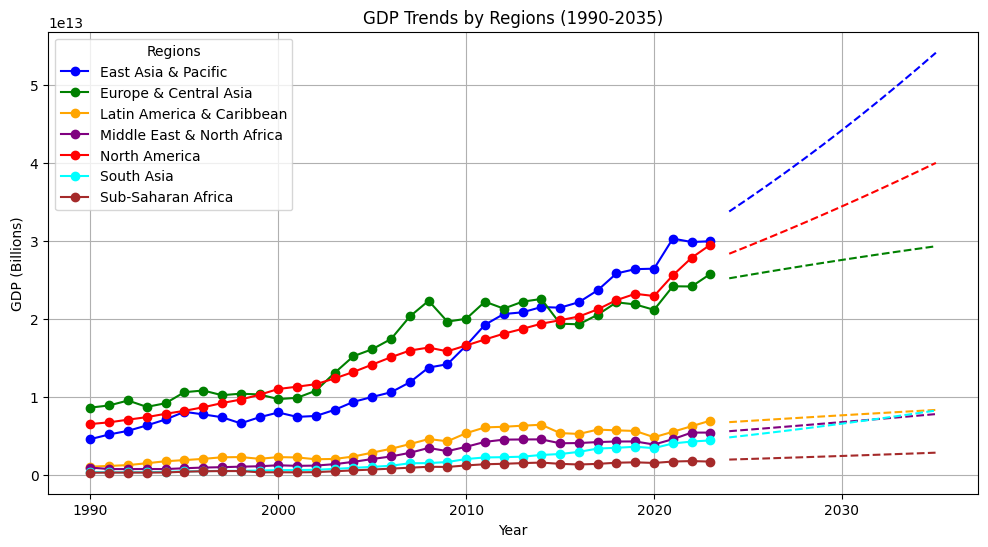

In [34]:
# Step 3: Visualization with corrected colors and labels
region_colors = {
    "East Asia & Pacific": "blue",
    "Europe & Central Asia": "green",
    "Latin America & Caribbean": "orange",
    "Middle East & North Africa": "purple",
    "North America": "red",
    "South Asia": "cyan",
    "Sub-Saharan Africa": "brown"
}

plt.figure(figsize=(12, 6))
for region in region_gdp_data["Region"].unique():
    # Historical Data
    historical_data = region_gdp_data[region_gdp_data["Region"] == region]
    plt.plot(
        historical_data["Year"],
        historical_data["GDP"],
        label=f"{region}",
        marker="o",
        color=region_colors[region]
    )

    # Predicted Data
    predicted_data = predictions_region[predictions_region["Region"] == region]
    plt.plot(
        predicted_data["Year"],
        predicted_data["Predicted_GDP"],
        linestyle="dashed",
        color=region_colors[region]
    )

plt.title("GDP Trends by Regions (1990-2035)")
plt.xlabel("Year")
plt.ylabel("GDP (Billions)")
plt.legend(title="Regions")
plt.grid()
plt.show()

**East Asia & Pacific** is projected to maintain its lead with a forecasted GDP of **$54.15 trillion**, largely driven by China and other rapidly industrializing economies. Following this, **North America**, with the United States at its core, is predicted to reach **$40.03 trillion**, underscoring its sustained economic influence.

**Europe & Central Asia**, despite slower growth compared to other leading regions, remains a significant player with a GDP forecast of **$29.35 trillion**, reflecting its industrial base and strong trade networks. In emerging regions, **South Asia** demonstrates remarkable potential, with a projected GDP of **$8.29 trillion**, driven by India's growth and regional development. Similarly, **Latin America & Caribbean** and **Middle East & North Africa** are forecasted at **$8.36 trillion** and **$7.83 trillion**, respectively, showcasing their growth trajectories fueled by demographic trends and resource-based economies.

Finally, **Sub-Saharan Africa**, while forecasted at **$2.88 trillion**, remains on an upward trend, highlighting the untapped potential within its economies despite structural challenges.

These forecasts underscore the dynamic nature of global economic growth. Established regions like **East Asia & Pacific** and **North America** continue to dominate, while emerging regions like **South Asia** and **Sub-Saharan Africa** show promising growth trajectories. 

By leveraging the **World Bank’s standard regional classifications**, this analysis provides an objective and comprehensive framework for understanding global economic dynamics, emphasizing the importance of fostering trade, technological advancements, and sustainable development to unlock the full potential of regional economies.

# Mexico in the Global Economy: A Look at Past Trends and Future Paths

Mexico plays a **strategic role in the global economy**, particularly within Latin America and North America. This section focuses on **Mexico’s GDP trends**, examining its historical growth, economic challenges, and resilience over the years. Given its **strong trade agreements and industrial capacity**, Mexico’s economic performance offers valuable insights into regional and global economic dynamics.  

Over six decades, Mexico has shown remarkable resilience in navigating both regional and global economic challenges. However, the journey has been far from linear, with critical crises leaving an indelible mark on the country’s growth patterns.

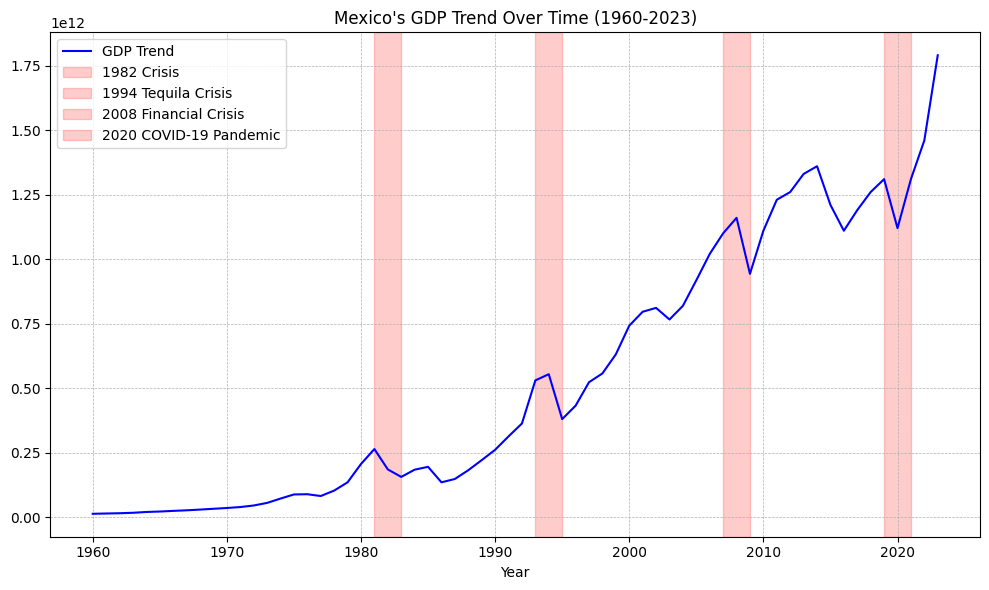

In [35]:
# Filter data for Mexico
df_mexico = df_year_int[df_year_int["Country"] == "Mexico"].copy()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_mexico["Year"], df_mexico["GDP"], color="blue", label="GDP Trend")
plt.xlabel("Year")
plt.title("Mexico's GDP Trend Over Time (1960-2023)")

# Add vertical shading for important events
important_years = {
    "1982 Crisis": 1982,
    "1994 Tequila Crisis": 1994,
    "2008 Financial Crisis": 2008,
    "2020 COVID-19 Pandemic": 2020
}
for label, year in important_years.items():
    plt.axvspan(year - 1, year + 1, color="red", alpha=0.2, label=label)

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

- The **1982 Debt Crisis**, triggered by external debt mismanagement and falling oil prices, led to severe economic contraction and set the stage for structural reforms. 

- A decade later, the **1994 Tequila Crisis**, fueled by political instability and a currency devaluation, underscored Mexico’s vulnerability to external shocks despite its ambitious trade liberalization efforts, including NAFTA. 

- The **2008 Global Financial Crisis** caused a significant dip, reflecting Mexico’s strong economic ties to the United States. 

- Most recently, the **COVID-19 Pandemic in 2020** brought global economic activity to a standstill, yet Mexico’s recovery has been notably robust.

Despite these setbacks, Mexico’s overall GDP trend reflects consistent growth, driven by its export-oriented economy, robust manufacturing sector, and integration into global trade networks. The strategic response to crises and participation in agreements like **USMCA** have strengthened its position as a key player in the Americas. Moving forward, understanding these historical dynamics is crucial as we delve into deeper analyses of Mexico’s economic performance and its implications for the future.

## Insights Into Mexico’s Economic Performance

Let's offer a closer look at Mexico's economic growth rates and how they reflect both resilience and structural challenges. While the crises we’ve outlined—1982, 1994, 2008, and 2020—are evident as sharp dips, this chart adds depth by highlighting the pace and nature of recovery in the years that followed.

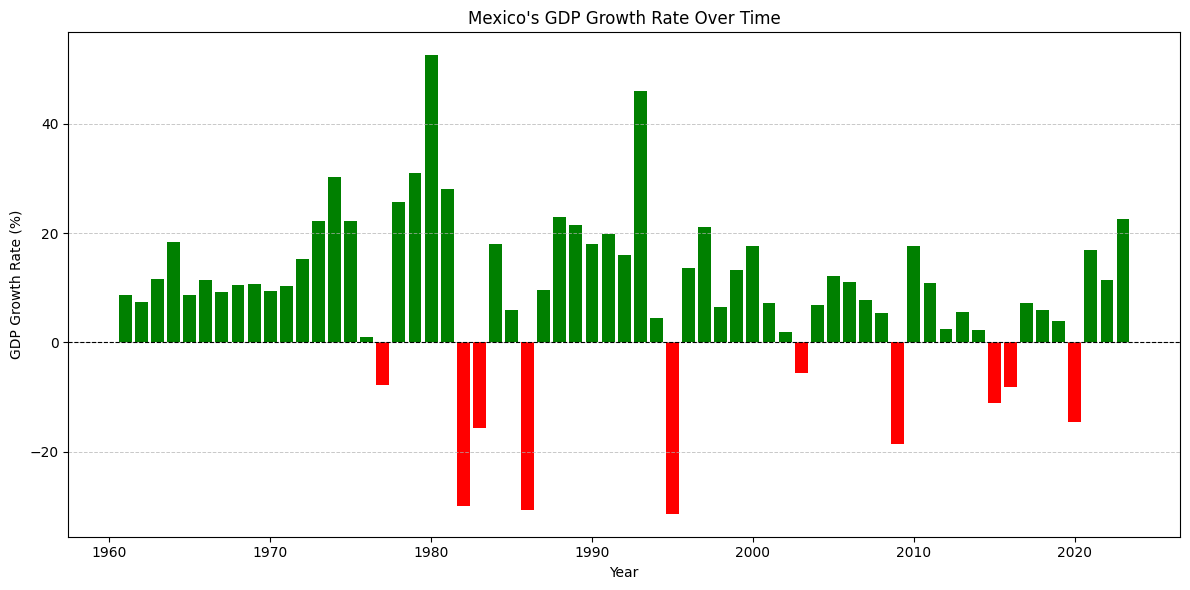

In [36]:
# Calculate GDP growth rate for Mexico
df_mexico["GDP Growth Rate (%)"] = df_mexico["GDP"].pct_change() * 100

# Plot GDP Growth Rate
plt.figure(figsize=(12,6))
colors = ['red' if value < 0 else 'green' for value in df_mexico["GDP Growth Rate (%)"]]
plt.bar(df_mexico["Year"], df_mexico["GDP Growth Rate (%)"], color=colors)

plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate (%)")
plt.title("Mexico's GDP Growth Rate Over Time")
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

What stands out is Mexico's capacity for **robust rebounds**. For instance, after the 1982 and 1994 crises, the country experienced rapid growth rates, signaling the effectiveness of structural reforms and trade liberalization, such as the implementation of NAFTA. These periods of recovery reveal a **strong export-oriented economy** capable of leveraging its manufacturing and trade networks.

Another key insight is the **variability in growth rates**. While there are moments of high economic expansion, such as in the early 1990s and post-2008, there are also periods of stagnation or low growth, particularly in the 2010s. This suggests that while Mexico has a foundation for resilience, its economy remains **vulnerable to external shocks** and structural inefficiencies.

The chart also highlights the **volatile but upward trajectory** of the economy over time. Despite setbacks, Mexico's growth rates often bounce back to positive territory, underscoring its **ability to adapt to changing global conditions**. The consistent pattern of recovery demonstrates the importance of trade integration, industrial capacity, and strategic reforms.

As we move forward, we realize that Mexico's economy, while not immune to global disruptions, has consistently shown the **ability to recover and build momentum**. These insights set the stage for deeper analysis of Mexico’s current economic position and potential for sustained growth in an increasingly competitive global landscape.

## Mexico’s Economic Outlook: 2024-2034 Forecast

Using the **Holt-Winters Exponential Smoothing model**, we forecasted Mexico's GDP from 2024 to 2034. This approach is particularly well-suited for identifying and extrapolating trends in time series data. The Holt-Winters method applies **three components—level, trend, and seasonality**—to produce smoother forecasts, making it highly effective for datasets with consistent patterns. Although we excluded the seasonality component for this analysis (given the lack of seasonal economic data for Mexico's GDP), the model still provided a robust framework for trend-based forecasting.

We chose the Holt-Winters model over **Polynomial Regression** and **XGBoost** for this analysis due to its simplicity and focus on temporal trends. However, this model also comes with its own set of limitations. It assumes that past patterns will continue into the future, which may not hold true in the face of **unforeseen events** such as economic crises, technological disruptions, or major policy shifts. Additionally, the model does not account for external influences like inflation, fiscal policies, trade agreements, or geopolitical factors, which are critical drivers of economic performance. As a result, while the Holt-Winters model provides a useful starting point for understanding potential trends, it should not be viewed as a definitive predictor of Mexico’s economic future.

Despite these limitations, the Holt-Winters model was chosen because it aligns well with our data constraints and the objective of producing a trend-focused analysis. By leveraging historical GDP data, this approach offers a straightforward and interpretable projection, providing valuable insights into Mexico's potential economic trajectory while highlighting the importance of integrating more comprehensive datasets for future analyses.

/Users/leobabel/anaconda3/envs/py312/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/leobabel/anaconda3/envs/py312/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


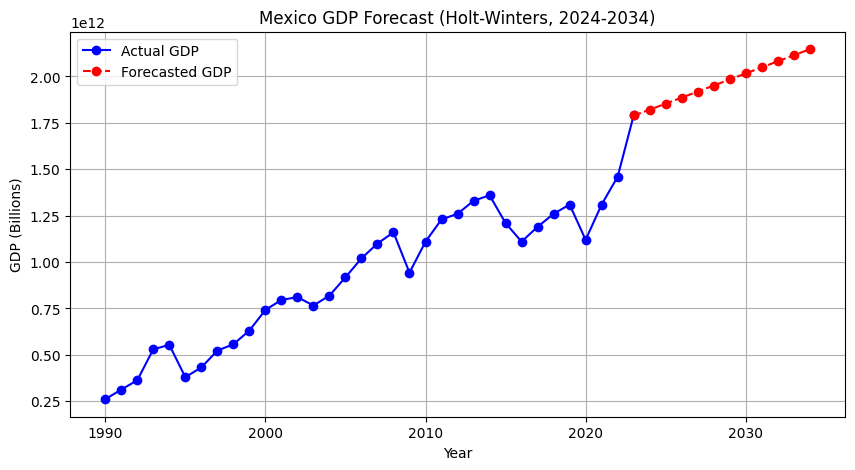

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd
import matplotlib.pyplot as plt

# Filter for Mexico's GDP
mexico_gdp_esm_data = df1990_dropped[df1990_dropped["Country"] == "Mexico"][["Year", "GDP"]]
mexico_gdp_esm_data["Year"] = pd.to_datetime(mexico_gdp_esm_data["Year"], format="%Y")
mexico_gdp_esm_data.set_index("Year", inplace=True)
mexico_gdp_esm_data["GDP"] = mexico_gdp_esm_data["GDP"].astype(float)

# Fit Holt-Winters model (additive trend, no seasonality)
mexico_hw_model = ExponentialSmoothing(
    mexico_gdp_esm_data["GDP"],
    trend="additive",
    seasonal=None
).fit()

# Forecast for 2024-2034
mexico_forecast_years = pd.date_range(start="2024", periods=11, freq="YS")
mexico_forecast_values = mexico_hw_model.forecast(steps=11)

# Add 2023 GDP to forecast values
mexico_gdp_holt_2023 = mexico_gdp_esm_data["GDP"].iloc[-1]  # Use the last actual GDP value (2023)
forecast_values_with_2023 = [mexico_gdp_holt_2023] + list(mexico_forecast_values)
forecast_years_with_2023 = [2023] + list(mexico_forecast_years.year)

# Create a complete forecast DataFrame
mexico_gdp_holt_forecast_df = pd.DataFrame({
    "Year": forecast_years_with_2023,
    "Predicted_GDP": forecast_values_with_2023
})

# Calculate annual growth rate as a percentage
mexico_gdp_holt_forecast_df["GDP_Growth_%"] = mexico_gdp_holt_forecast_df["Predicted_GDP"].pct_change() * 100
mexico_gdp_holt_forecast_df = mexico_gdp_holt_forecast_df.round({"GDP_Growth_%": 2})  # Round percentage growth to 2 decimals

# Plot the actual GDP and forecasted values
plt.figure(figsize=(10, 5))
plt.plot(mexico_gdp_esm_data.index.year, mexico_gdp_esm_data["GDP"], label="Actual GDP", color="blue", marker="o")
plt.plot(mexico_gdp_holt_forecast_df["Year"], mexico_gdp_holt_forecast_df["Predicted_GDP"], label="Forecasted GDP", linestyle="dashed", color="red", marker="o")
plt.xlabel("Year")
plt.ylabel("GDP (Billions)")
plt.title("Mexico GDP Forecast (Holt-Winters, 2024-2034)")
plt.legend()
plt.grid()
plt.show()

Our model predicts a steady GDP growth rate, starting at **1.74% in 2024** and gradually declining to **1.54% by 2034**, suggesting a gradual stagnation in growth. The chart illustrates a consistent upward trajectory for Mexico's GDP, with the forecast reaching approximately **$2.15 trillion USD by 2034**.

The **World Bank reported a robust GDP growth of 3.1% for 2023**, indicating a stronger-than-expected recovery. However, our model doesn't fully capture this dynamic due to its focus on historical trends and exclusion of short-term external factors. On the other hand, the **Bank of Mexico projects a GDP growth rate of 1.8% for 2024**, aligning closely with our model's forecast of **1.74%**. This alignment lends credibility to our model for predicting medium-term growth trends, even with its simplified approach.

In [38]:
# Print the forecast DataFrame with growth rates
print(mexico_gdp_holt_forecast_df)

    Year  Predicted_GDP  GDP_Growth_%
0   2023   1.790000e+12           NaN
1   2024   1.821096e+12          1.74
2   2025   1.853682e+12          1.79
3   2026   1.886268e+12          1.76
4   2027   1.918854e+12          1.73
5   2028   1.951440e+12          1.70
6   2029   1.984026e+12          1.67
7   2030   2.016612e+12          1.64
8   2031   2.049199e+12          1.62
9   2032   2.081785e+12          1.59
10  2033   2.114371e+12          1.57
11  2034   2.146957e+12          1.54




**While our model underestimates the strong recovery seen in 2023, it aligns well with the Bank of Mexico's more moderate outlook for 2024**, reinforcing the model’s validity for **stabilized, long-term growth scenarios**. The forecast also suggests that Mexico’s economy may face **growth stagnation over the next decade**, with annual growth rates gradually declining.

Our forecast demonstrates the utility of trend-based models in predicting medium- to long-term economic trajectories. The model’s alignment with the **Bank of Mexico’s projections** underscores its reliability, even when simplified. However, discrepancies with the **World Bank’s 2023 data** highlight the need for integrating more variables to capture short-term fluctuations. As Mexico continues to navigate global economic shifts, understanding both the strengths and limitations of such models will remain crucial for informed decision-making.

_Sources:_
- World Bank: https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?locations=MX&utm_source=chatgpt.com
- Bank of Mexico: https://www.banxico.org.mx/TablasWeb/informes-trimestrales/enero-marzo-2024/E4E1625E-2CF7-49BB-911D-5616F98723CA.html?utm_source=chatgpt.com

# Conclusions

This project has provided a **comprehensive, data-driven analysis of global economic trends**, using historical data and forecasting models to anticipate economic developments up to 2035. By analyzing **individual countries, economic blocks, trade agreements, and regional trends**, we have gained insights into **how economic power is shifting, which nations and regions are expected to lead, and where Mexico stands in this evolving landscape**. Our findings not only highlight significant economic transformations but also underscore the **strengths, weaknesses, and future opportunities for Mexico and other key players in the global economy**.

## Global Economic Shifts: The Rise of New Powerhouses

One of the most striking findings in our analysis is the **gradual but undeniable shift in economic power from the traditional Western economies to emerging markets, particularly in Asia**. While the **G7 remains an economic giant**, projections suggest that by 2035, **BRICS (Brazil, Russia, India, China, and South Africa) will rival or surpass its economic output**, reflecting the increasing importance of **China and India as global growth engines**. 

Regions such as **East Asia & Pacific and South Asia** show **strong growth trajectories**, driven by **technological advancements, demographic expansion, and industrialization**. China, as a **standalone economy**, demonstrates an **overwhelming economic presence**, rivaling the collective GDP of entire trade agreements. Meanwhile, India, as part of **SAARC**, is emerging as a **formidable force**, expected to **outpace Latin America, the Middle East, and even Europe in economic expansion**. 

These shifts indicate a **new economic world order** in which power is increasingly concentrated in Asia. The implications for global trade, investment, and geopolitical influence are profound, as countries will need to adapt to this new reality by **strengthening trade relationships, investing in innovation, and fostering economic resilience**.

## Trade Agreements: The Key to Sustained Economic Growth

Another key insight from this project is the **critical role of trade agreements in shaping economic growth**. **USMCA stands out as the most dominant trade agreement, largely due to the economic might of the United States.** Its projected GDP in 2035 surpasses that of any other economic alliance, reinforcing **North America’s continued relevance as a global economic hub**. 

The **European Union**, despite its internal challenges, remains a **strong economic force**, although it faces **slower projected growth rates compared to other regions**. Meanwhile, **ASEAN showcases steady growth**, reflecting the increasing integration of Southeast Asian economies and their collective potential. 

The inclusion of **China as a standalone entity and SAARC as a representative of India and its neighbors** underscores how **these economic giants operate both independently and as part of larger regional frameworks**. Their economic momentum highlights **the need for other nations and regions to reassess their strategies and trade policies** in order to remain competitive in a rapidly changing global economy.

## Mexico’s Position: Resilience and Strategic Opportunities

For Mexico, the findings are both **encouraging and cautionary**. The country is projected to **experience steady but moderate economic growth over the next decade**, benefiting from its strong **industrial base, trade agreements, and proximity to the United States**. As part of **USMCA**, Mexico is uniquely positioned to **leverage nearshoring trends, attract foreign investment, and strengthen its role as a manufacturing powerhouse**. 

However, our forecasts also **highlight Mexico’s economic vulnerabilities**. While **trade integration has strengthened its industrial sector**, **growth remains constrained by structural challenges**, including **income inequality, corruption, weak institutional frameworks, and limited technological innovation**. Moreover, the **long-term stagnation in growth rates** suggests that, unless **key economic reforms are implemented, Mexico may struggle to break out of its current growth trajectory**. 

To capitalize on its potential, **Mexico must focus on long-term structural improvements** by:
- **Enhancing its education system** to support high-value industries.
- **Investing in technology and digital transformation** to move beyond low-cost manufacturing.
- **Strengthening institutions and governance** to attract more foreign investment.
- **Expanding infrastructure and logistics capabilities** to improve competitiveness in global trade.

## Economic Forecasting: Strengths, Limitations, and Future Directions

Our forecasting approach, **based on Polynomial Regression and Holt-Winters Exponential Smoothing**, provided valuable insights into **long-term economic trends**. **Polynomial Regression effectively captured long-term GDP trajectories**, while **Holt-Winters allowed us to predict Mexico’s short-term economic fluctuations with greater adaptability**. However, **these models have limitations**, as they rely solely on historical GDP data and do not account for **external shocks, policy changes, demographic shifts, or geopolitical factors**. 

Future research should incorporate:
- **Macroeconomic indicators such as inflation, employment, trade balances, and debt levels.**
- **The impact of disruptive events such as financial crises, pandemics, and technological breakthroughs.**
- **Advanced machine learning techniques** to refine forecasting accuracy.

Despite these limitations, **our analysis aligns with real-world projections from institutions such as the Bank of Mexico and the World Bank**, reinforcing its credibility. While some discrepancies exist, particularly in short-term fluctuations, **the broader trends remain consistent with expert forecasts**.

## Final Thoughts: The Road Ahead

The findings of this project illustrate a world **undergoing a major economic transformation**. **Asia’s rise, shifting trade dynamics, and the increasing role of regional economic alliances** will redefine global markets in the coming decades. **Mexico, while facing challenges, has a window of opportunity to solidify its role as a key economic player in North America and beyond.** 

Moving forward, **nations that invest in innovation, education, and strategic partnerships will be best positioned to thrive in this evolving landscape**. Our analysis serves as a **guide for policymakers, businesses, and researchers seeking to understand the future of the global economy**, emphasizing the need for **proactive adaptation to emerging trends**. 

**The next decade will be crucial in determining which nations and regions emerge as true economic leaders.** For Mexico and many others, the decisions made today will shape their **economic destiny for years to come.**